## Objective:
Apple Stock Price Prediction for the Next 30 Days
The primary objective of this project is to develop a predictive model that forecasts Apple stock prices for the next 30 days using historical stock data from 2012 to 2019. The model will help investors, traders, and financial analysts make informed decisions based on stock trends and potential market movements.
________________________________________
## Key Goals:
  ✅ Develop a time series forecasting model to predict Apple’s stock price for the next 30 days.

  ✅ Analyze short-term and long-term trends in stock prices.

  ✅ Explore the impact of external events (e.g., earnings reports, macroeconomic events, global financial crises) on Apple’s stock.

  ✅ Evaluate different machine learning models such as ARIMA, SARIMA, and XGBoost for accurate forecasting.

  ✅ Visualize trends, seasonality, and volatility in Apple’s stock prices.

  ✅ Deploy the final forecasting model using a Flask/Streamlit web app to allow real-time predictions.


## Dataset & Attributes
The dataset consists of daily stock market data for Apple from 2012 to 2019, including:

📌 Stock Market Indicators:

  ●	Date: Trading date

  ●	Open: Opening price of Apple stock for the day

  ●	High: Highest price reached during the day

  ●	Low: Lowest price reached during the day

  ●	Close: Closing price of Apple stock for the day

  ●	Volume: Number of shares traded on that day

📌 Target Variable:

  ●	Next 30-Day Close Price Forecast

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded= files.upload()

Saving AAPL (4).csv to AAPL (4).csv


In [3]:
df= pd.read_csv('AAPL (4).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
df.shape

(2011, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


# 1. Data Preprocessing

In [6]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [7]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [8]:
df.duplicated().sum()

np.int64(0)

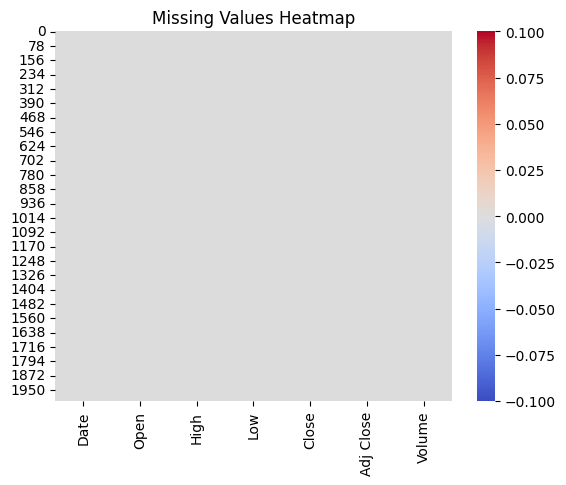

In [9]:
# 1. Missing Values Heatmap
sns.heatmap(df.isnull(), cbar= True, cmap = 'coolwarm')
plt.title('Missing Values Heatmap')
plt.show()

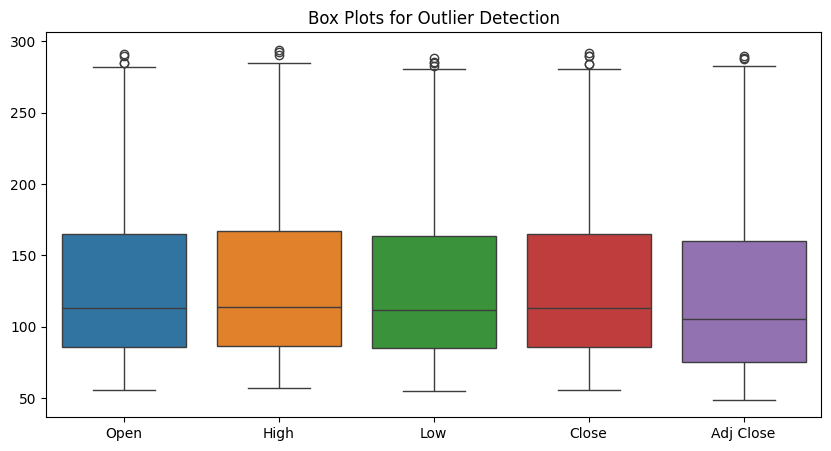

In [10]:
# 2. Box Plots for Outlier Detection
exclude= ['Date']
cols_to= [col for col in df.columns if col not in exclude]

plt.figure(figsize= (10, 5))
sns.boxplot(data= df[['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.title('Box Plots for Outlier Detection')
plt.show()

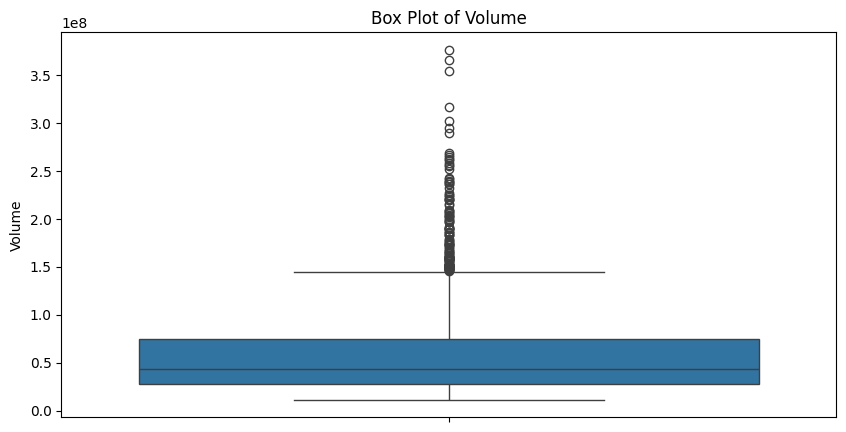

In [11]:
plt.figure(figsize= (10, 5))
sns.boxplot(data= df['Volume'])
plt.title('Box Plot of Volume')
plt.show()

In [12]:
for col in cols_to:
  Q1= df[col].quantile(0.25)
  Q3= df[col].quantile(0.75)
  IQR= Q3 - Q1

  lower_limit= Q1 - 1.5 * IQR
  upper_limit= Q3 + 1.5 * IQR

  df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

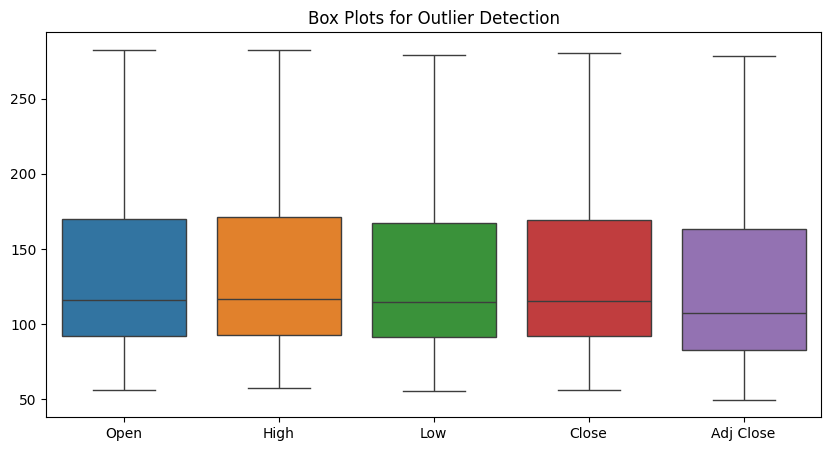

In [13]:
plt.figure(figsize= (10, 5))
sns.boxplot(data= df[['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.title('Box Plots for Outlier Detection')
plt.show()

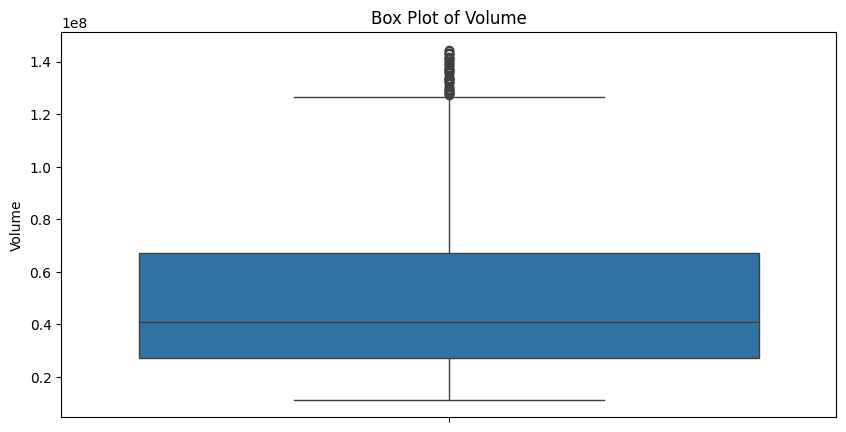

In [14]:
plt.figure(figsize= (10, 5))
sns.boxplot(data= df['Volume'])
plt.title('Box Plot of Volume')
plt.show()

In [15]:
df.shape

(1879, 7)

# 2. EDA

### i. Trend

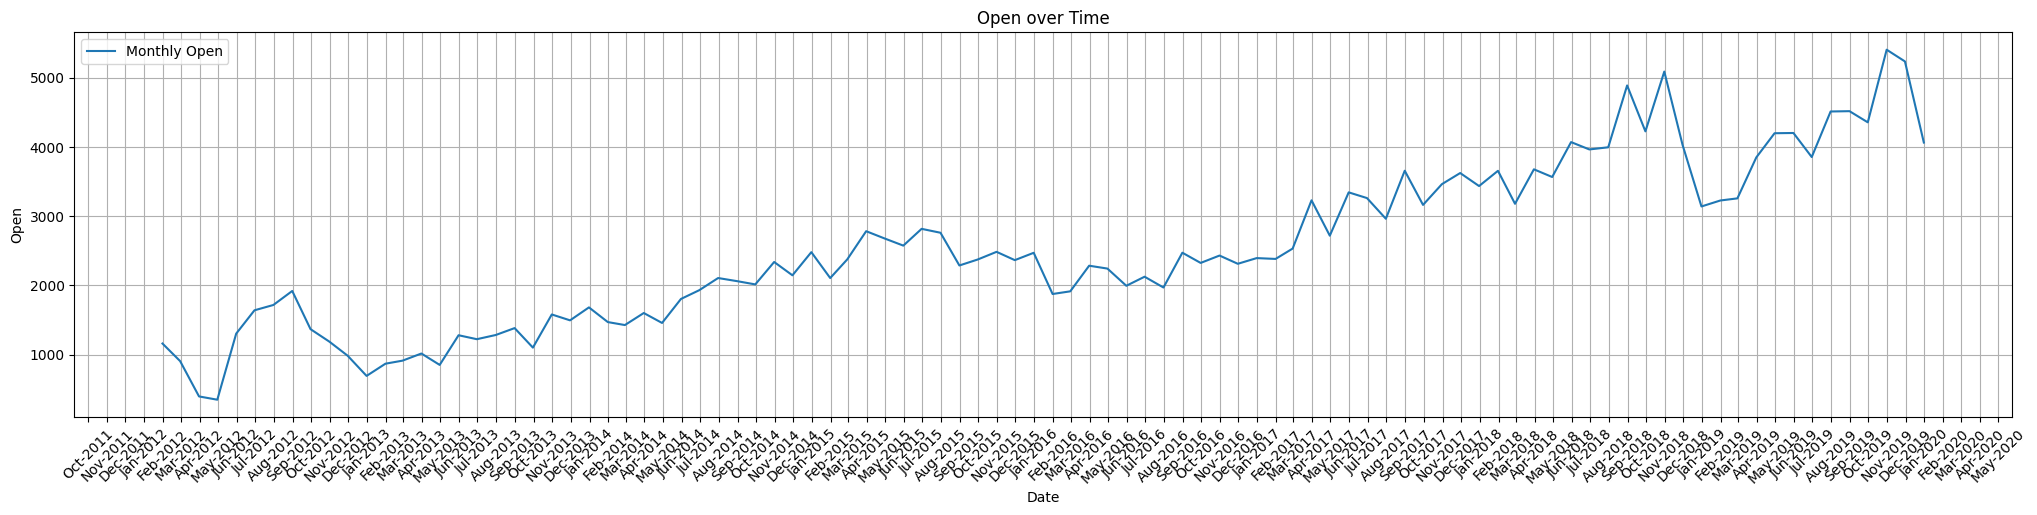

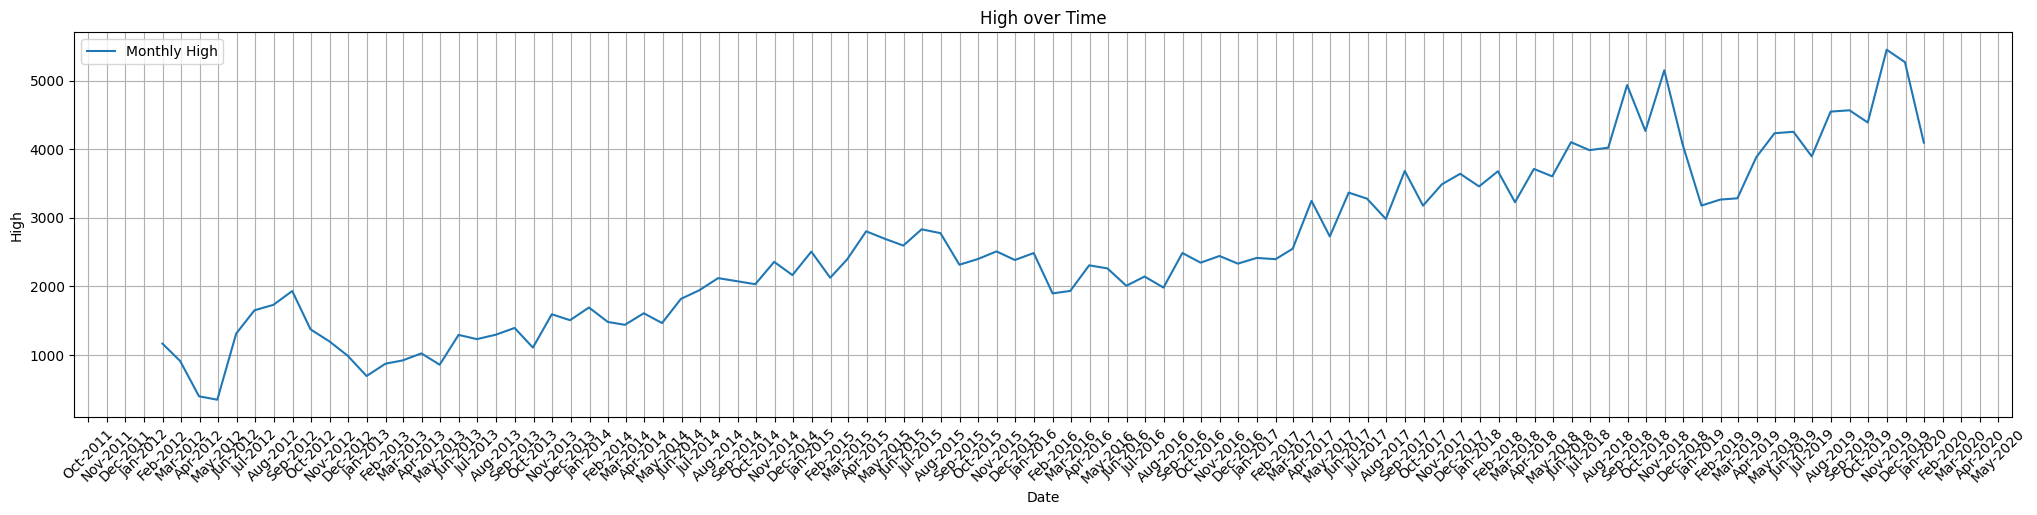

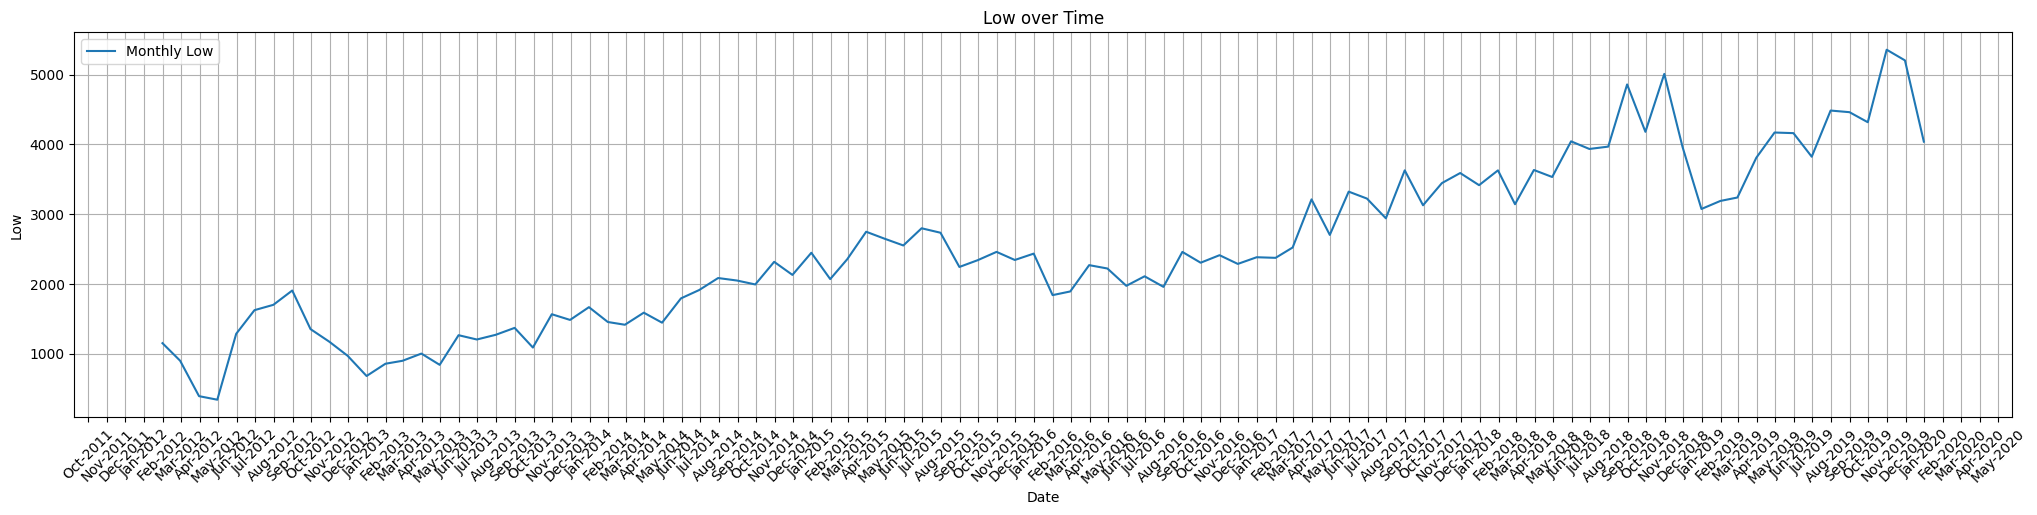

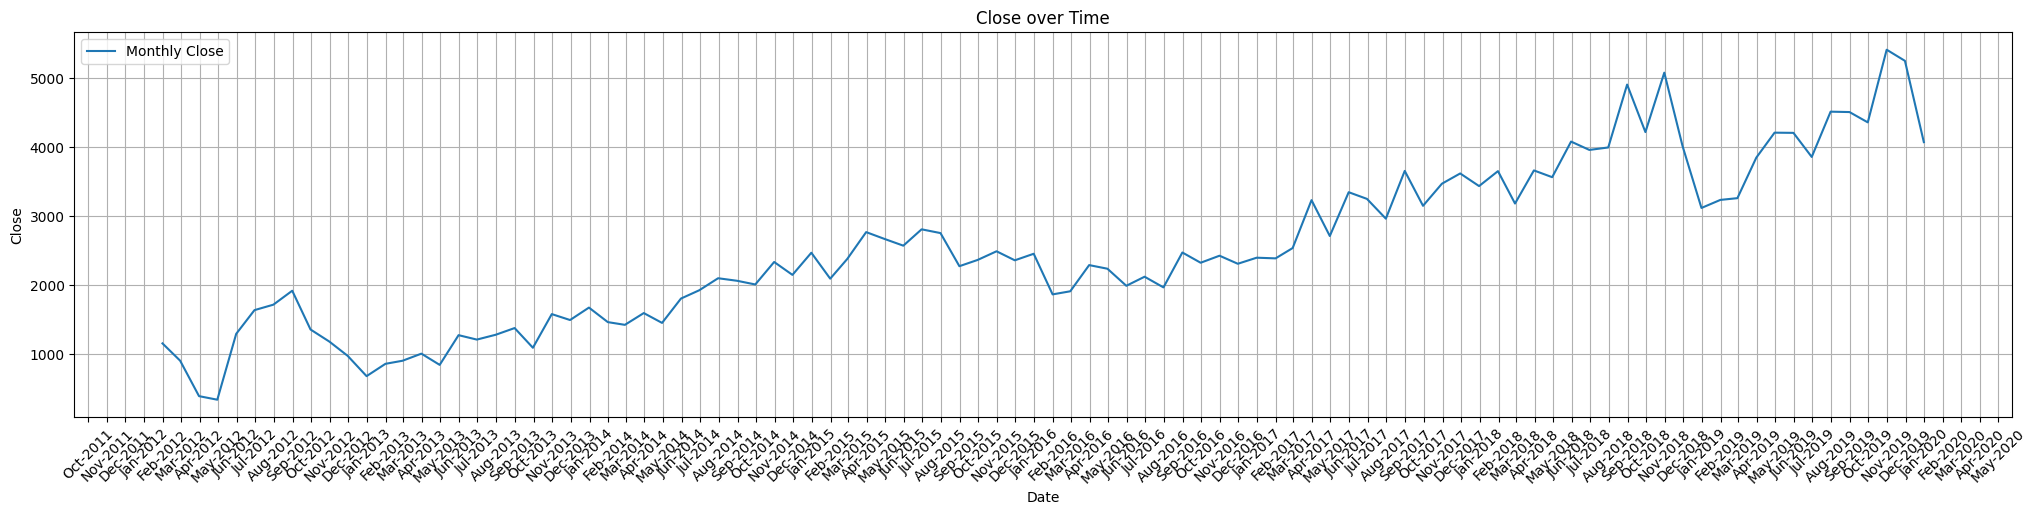

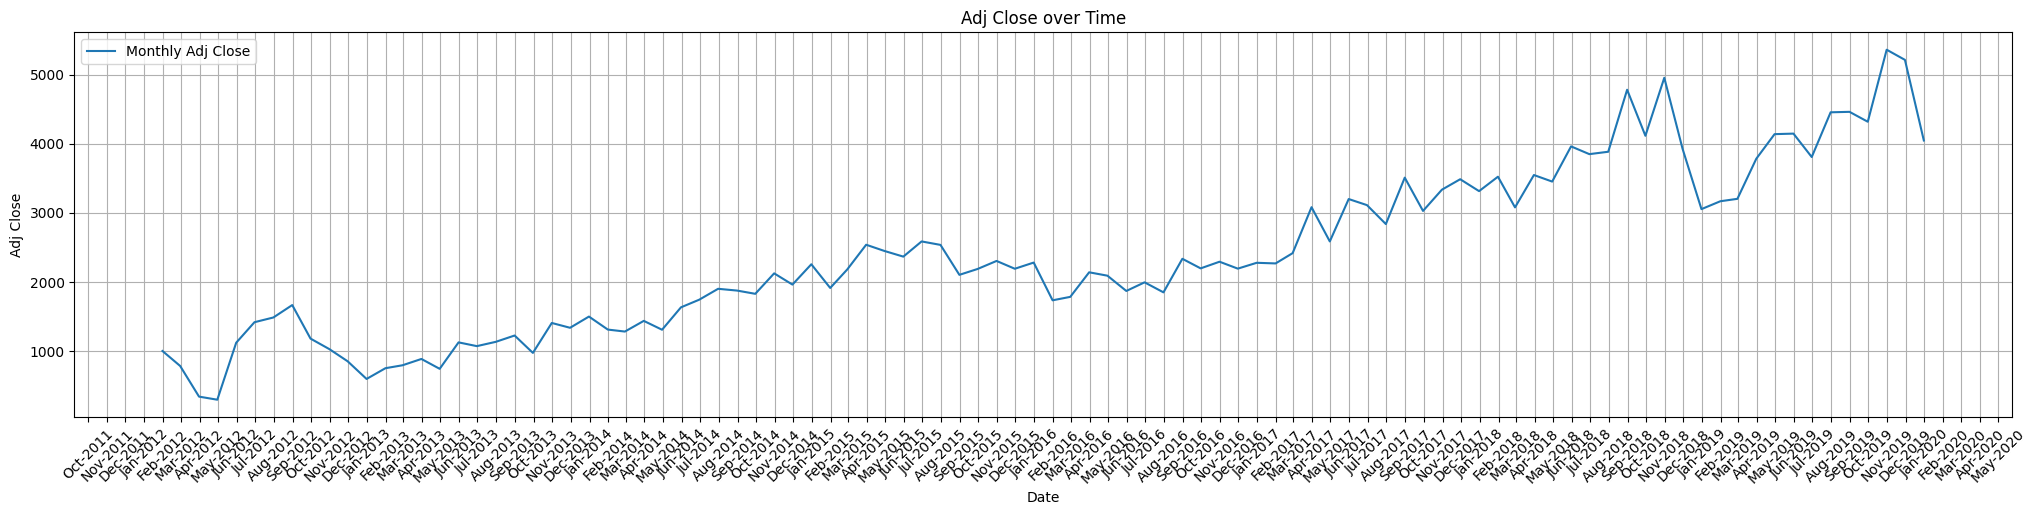

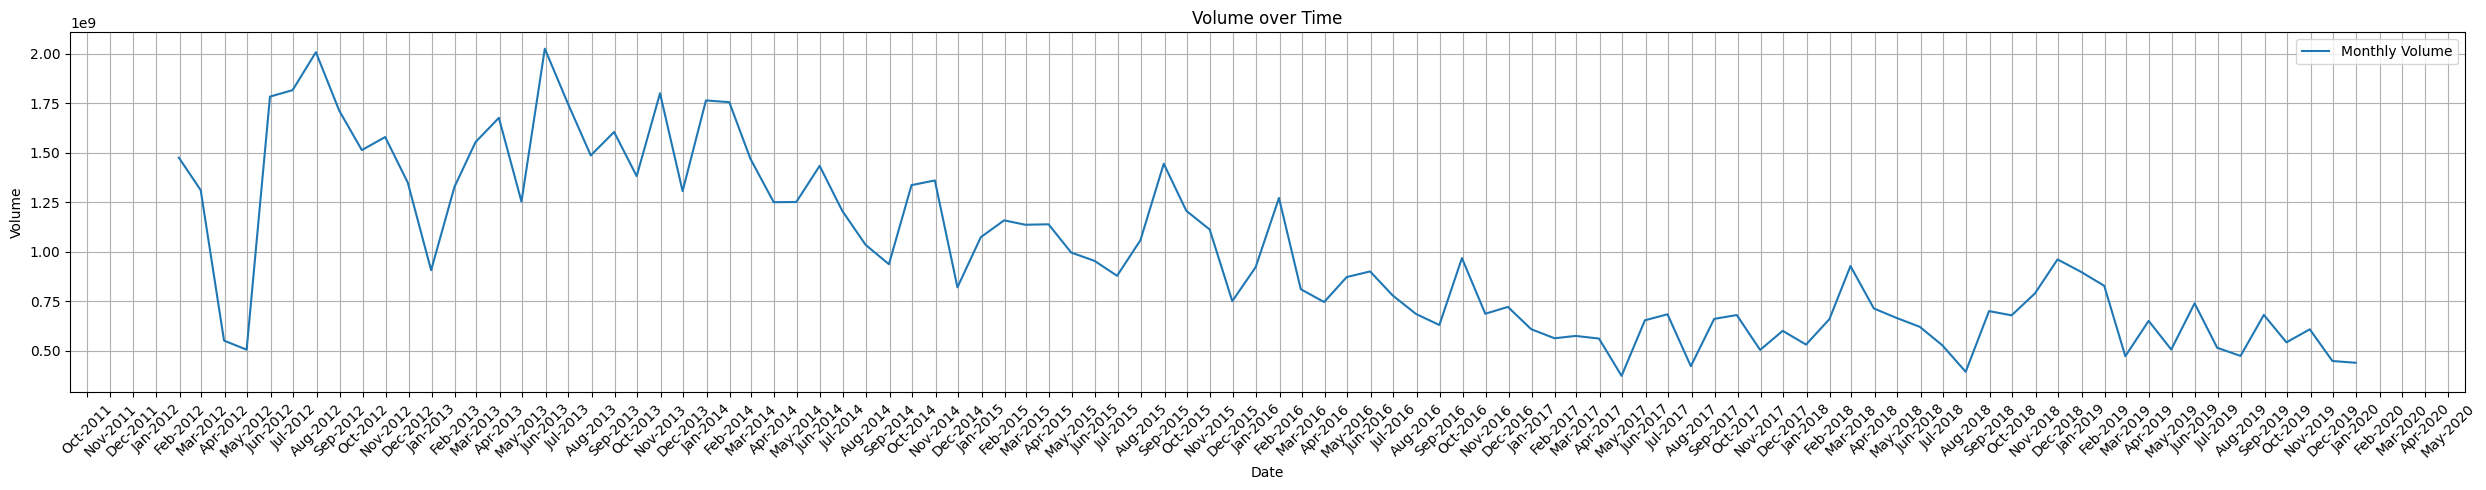

In [16]:
# 1. Line Plot of each 'Columns' over Time
import matplotlib.dates as mdates

# Ensure Date is datetime
df['Date']= pd.to_datetime(df['Date'], dayfirst= True)

# Group by Month and sum Volume
df_monthly= df.resample('M', on= 'Date').sum()

# Loop through all columns except 'Date'
for col in df_monthly.columns:
  plt.figure(figsize=(25, 5))
  plt.plot(df_monthly.index, df_monthly[col], label= f'Monthly {col}')
  plt.title(f'{col} over Time')
  plt.xlabel('Date')
  plt.ylabel(col)
  plt.xticks(rotation= 45)
  plt.grid(True)
  plt.legend()

  # Format x-axis to show every month
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval= 1)) # Show every month
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) # Format as 'Month-Year'

plt.tight_layout()
plt.show()

In [17]:
# 2. CandleStick Chart (OHLC)
import plotly.graph_objects as go

fig= go.Figure(data= [go.Candlestick(x= df['Date'],
                                    open= df['Open'],
                                    high= df['High'],
                                    low= df['Low'],
                                    close= df['Close'])])
fig.update_layout(title= 'Candlestick chart', xaxis_title= 'Date', yaxis_title= 'Price')
fig.show()

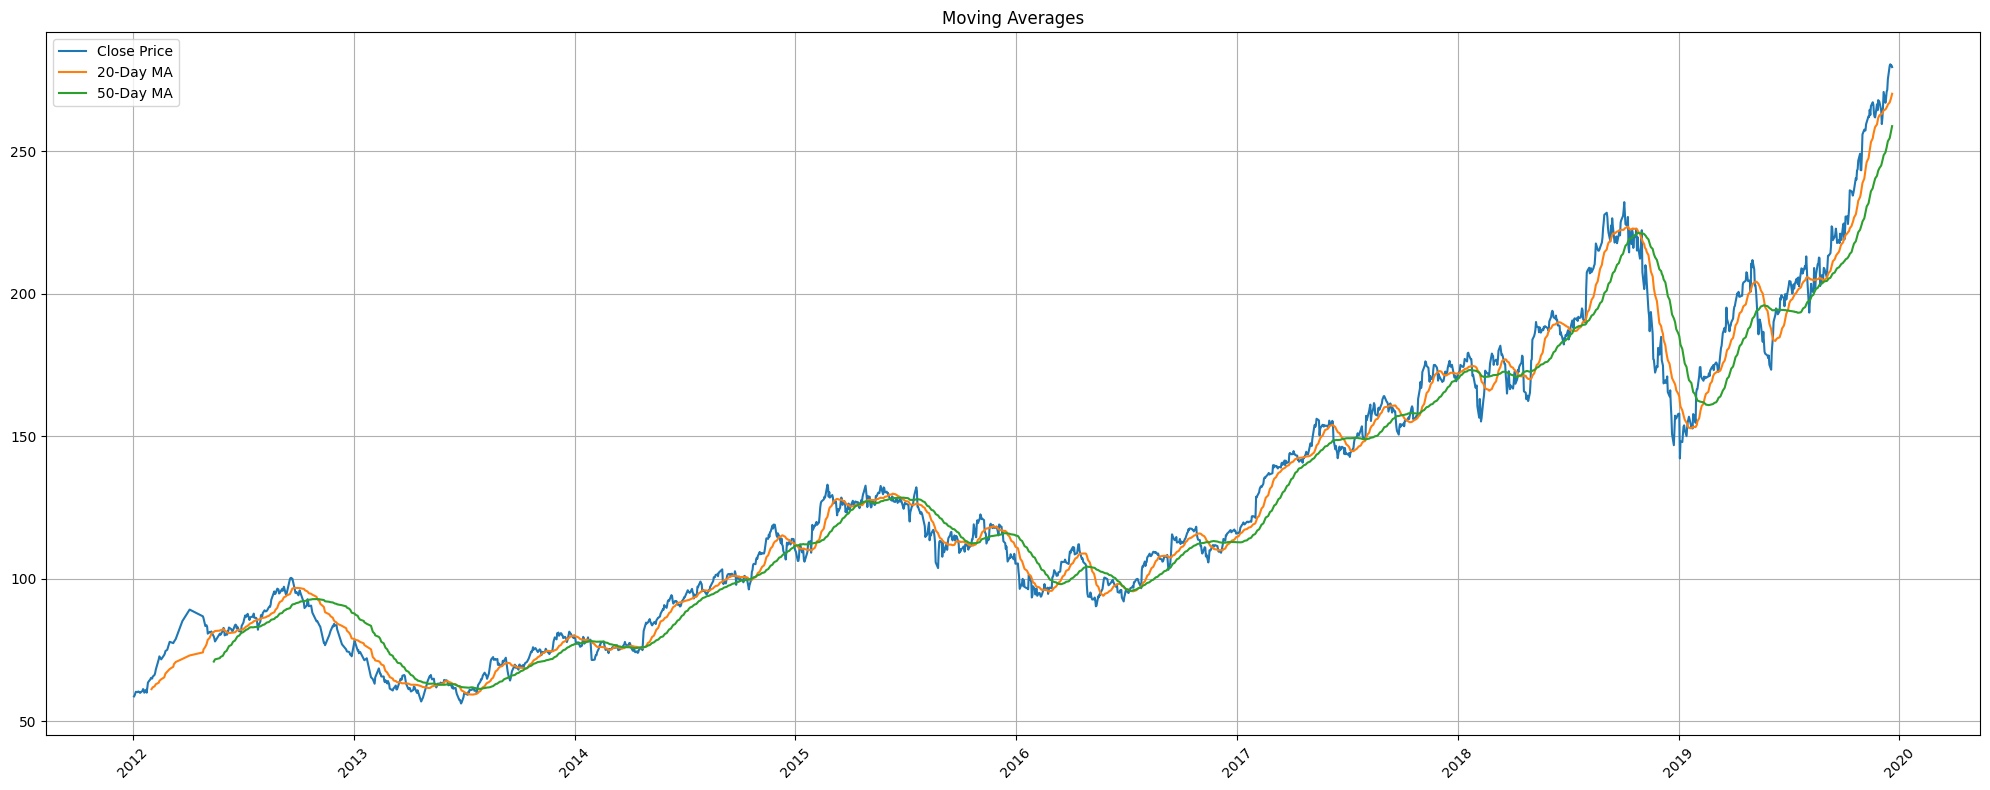

In [18]:
# 3. Rolling Mean (Moving Average)
df['MA_20']= df['Close'].rolling(window= 20).mean()
df['MA_50']= df['Close'].rolling(window= 50).mean()

plt.figure(figsize= (20, 8))
plt.plot(df['Date'], df['Close'], label= 'Close Price')
plt.plot(df['Date'], df['MA_20'], label= '20-Day MA')
plt.plot(df['Date'], df['MA_50'], label= '50-Day MA')
plt.title('Moving Averages')
plt.legend()
plt.xticks(rotation= 45)
plt.grid(True)
plt.tight_layout()
plt.show()

1. ##### Trend Detection and Smoothing
- The blue line (Close Price) fluctuates daily with volatility.
- The orange (20-Day MA) and green (50-Day MA) lines smooth out short-term noise and help visualize the overall trend.
- When both moving averages are rising, it signals a sustained uptrend (e.g., 2016–2020).

2. #####  Crossover Signals for Buy/Sell Decisions
- When the 20-day MA crosses above the 50-day MA, it often indicates a bullish trend — a good buy signal.
- When the 20-day MA crosses below the 50-day MA, it suggests a bearish trend — a potential sell signal.
- Several such golden cross and death cross points can be observed throughout the timeline.

3. #####  Support and Resistance Zones
- The 50-day MA (green) often acts as a support level in an uptrend — the price bounces upward after touching it.
- Conversely, in downtrends, it can serve as resistance — the price struggles to break above it.
- These zones help traders identify optimal entry and exit points.


**Trend**	=> Strong upward trend (clearly visible in the time series plot)

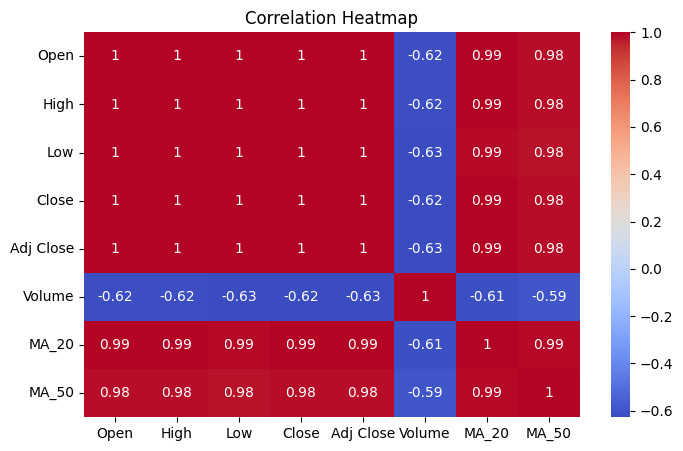

In [19]:
# 4. Correlation Heatmap
plt.figure(figsize= (8, 5))
sns.heatmap(df.drop('Date', axis= 1).corr(), annot= True, cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

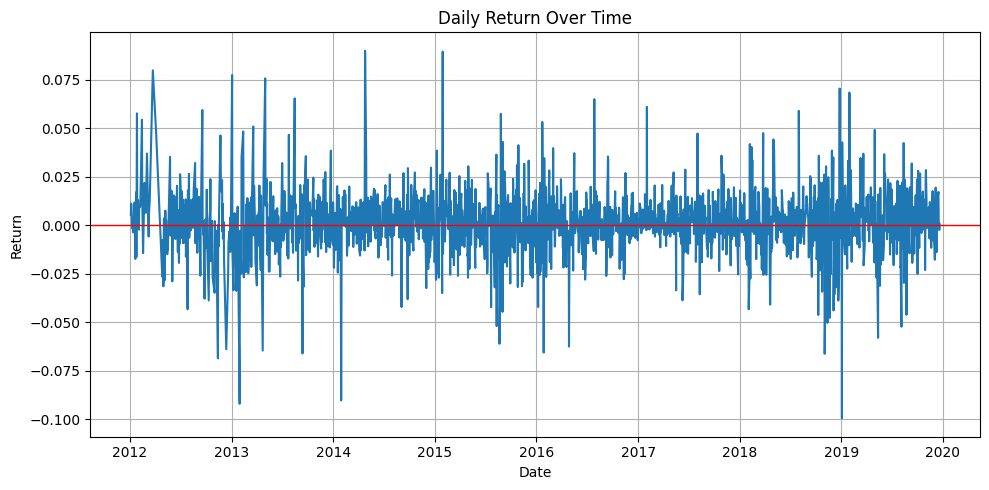

In [20]:
# 5. Daily Return plot => Measures return
df['Daily Return']= df['Close'].pct_change()

plt.figure(figsize= (10, 5))
plt.plot(df['Date'], df['Daily Return'], label= 'Daily Return')
plt.title('Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Return')
plt.axhline(0, color= 'red', linewidth= 1)
plt.grid(True)
plt.tight_layout()
plt.show()

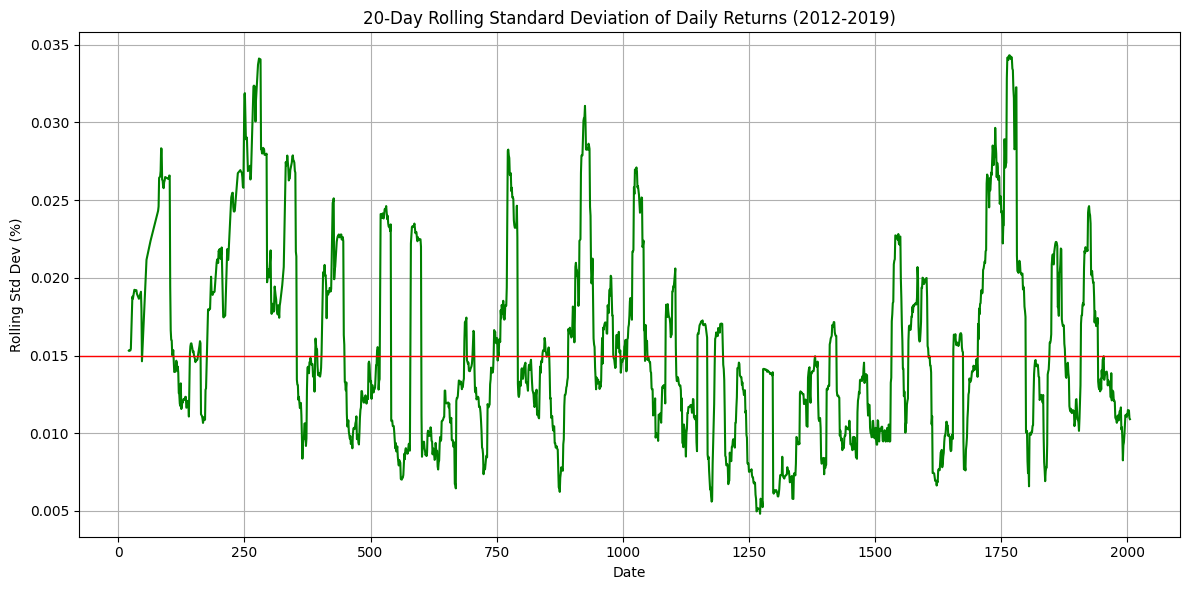

In [21]:
# Rolling Standard Deviation of Daily Returns =>	Measures risk
plt.figure(figsize= (12, 6))

rolling_std= df['Daily Return'].rolling(window=20).std()
rolling_std.plot(color= 'green')

# Plot
plt.title('20-Day Rolling Standard Deviation of Daily Returns (2012-2019)')
plt.xlabel('Date')
plt.ylabel('Rolling Std Dev (%)')
plt.axhline(0.015, color= 'red', linewidth= 1)
plt.grid()
plt.tight_layout()
plt.show()

1. ##### Volatility Clusters Are Evident
- Periods like 2012–2013 and 2018–2019 show larger spikes in daily returns (both positive and negative), indicating high volatility.
- Other times (e.g., mid-2016), the returns are tighter and more stable, suggesting lower market uncertainty.

2. ##### Mean Reversion Around Zero
- Most of the returns hover around zero, and extreme values are relatively rare.
- This suggests the stock does not trend strongly upward or downward on a daily basis, but rather fluctuates around a steady mean — a common trait of efficient markets.

3. ##### Presence of Negative Outliers
- There are several sharp negative return spikes, greater in magnitude than positive ones.
- This indicates that downward shocks are typically larger than upward gains, a phenomenon often seen in real-world financial data due to panic selling or news shocks.



In [22]:
print(df.isna().sum())
df.shape

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
MA_20           19
MA_50           49
Daily Return     1
dtype: int64


(1879, 10)

In [23]:
df.dropna(inplace= True)
df.shape

(1830, 10)

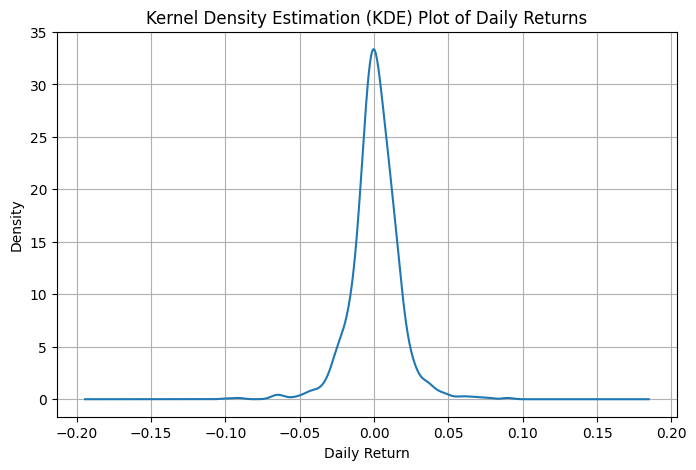

In [24]:
# 6. KDE plot of daily returns
df['Daily Return'].plot(kind= 'kde', figsize= (8, 5))
plt.title('Kernel Density Estimation (KDE) Plot of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.grid(True)
plt.show()

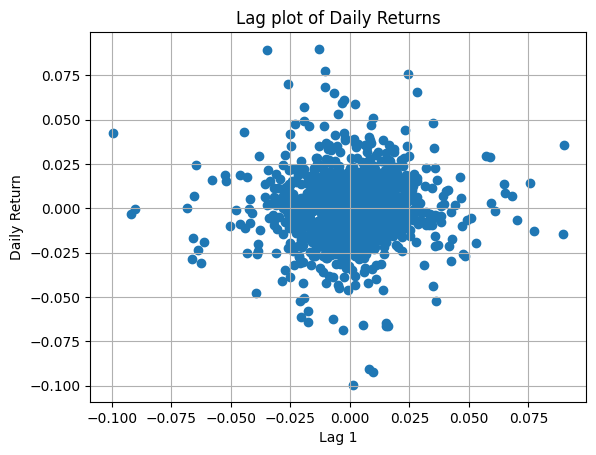

In [25]:
# 7. Lag Plot or Autocorrelation Plot
from pandas.plotting import lag_plot

lag_plot(df['Daily Return'].dropna())
plt.title('Lag plot of Daily Returns')
plt.xlabel('Lag 1')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

1. ##### No Strong Autocorrelation (Returns Are Random)
- The scatter points form a dense circular cloud around the origin without a clear linear trend.
- This suggests little to no linear relationship between the current return and the previous day’s return, which is consistent with the Efficient Market Hypothesis (EMH).

2. ##### Symmetrical Distribution Around Zero
- The distribution is evenly spread across all four quadrants, centered on (0, 0).
- This means positive and negative returns are equally likely and show no clear bias or momentum pattern.

3. ##### Most Returns Are Small
- The majority of points are clustered tightly near the center, implying small daily fluctuations are most common.
- Large returns (positive or negative) are infrequent outliers, reinforcing the idea that the asset is generally stable day to day, with occasional spikes.

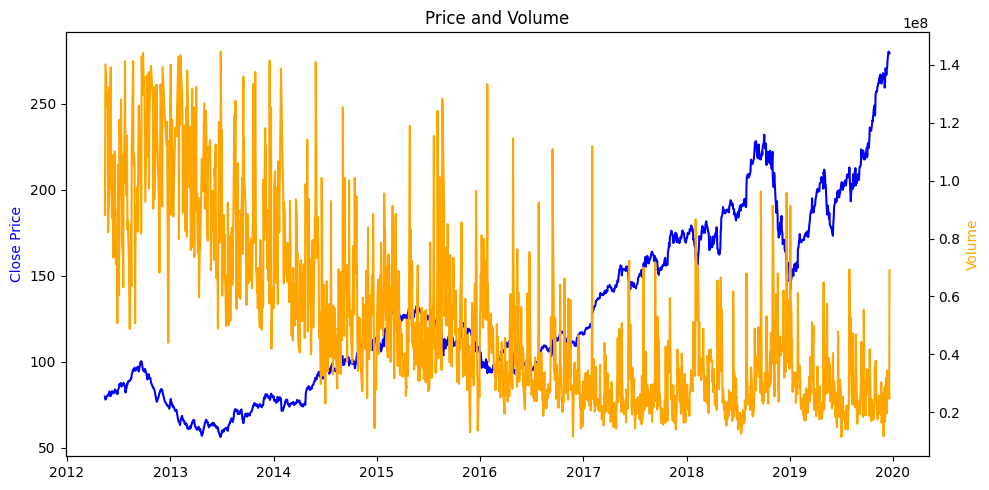

In [26]:
# 8. Dual Axis Plot (Combine Price + Volume)
fig, ax1= plt.subplots(figsize= (10,5))
ax1.set_title('Price and Volume')
ax1.plot(df['Date'], df['Close'], color= 'blue')
ax1.set_ylabel('Close Price', color= 'blue')

ax2= ax1.twinx()
ax2.plot(df['Date'], df['Volume'], color= 'orange')
ax2.set_ylabel('Volume', color= 'orange')

plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

1. #####  Strong Uptrend in Price Despite Volume Decline
- The blue line (Close Price) shows a consistent and strong upward trend from 2012 to 2020, especially after 2016.
- Meanwhile, orange spikes (Volume) show a declining pattern over time.
- This suggests that price appreciation is not always volume-driven, indicating fewer trades but possibly by larger investors or more confidence in the stock.

2. #####  Volume Spikes Are Often Followed by Volatility
- Occasional high volume spikes can be seen, especially in earlier years.
- These spikes often precede or coincide with price movement shifts, hinting at major trading events like earnings releases, news, or institutional activity.

3. #####  Inverse Relationship in Early Years
- In the 2012–2014 period, volume is relatively high while the price is low and fluctuating.
- As the price starts to rise (post-2016), volume generally trends downward, suggesting a potential inverse relationship during this phase, possibly due to consolidation or a more mature market environment.

In [27]:
exclude= ['Date', 'MA_20', 'MA_50']
cols_to_plot= [col for col in df.columns if col not in exclude]
cols_to_plot

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return']

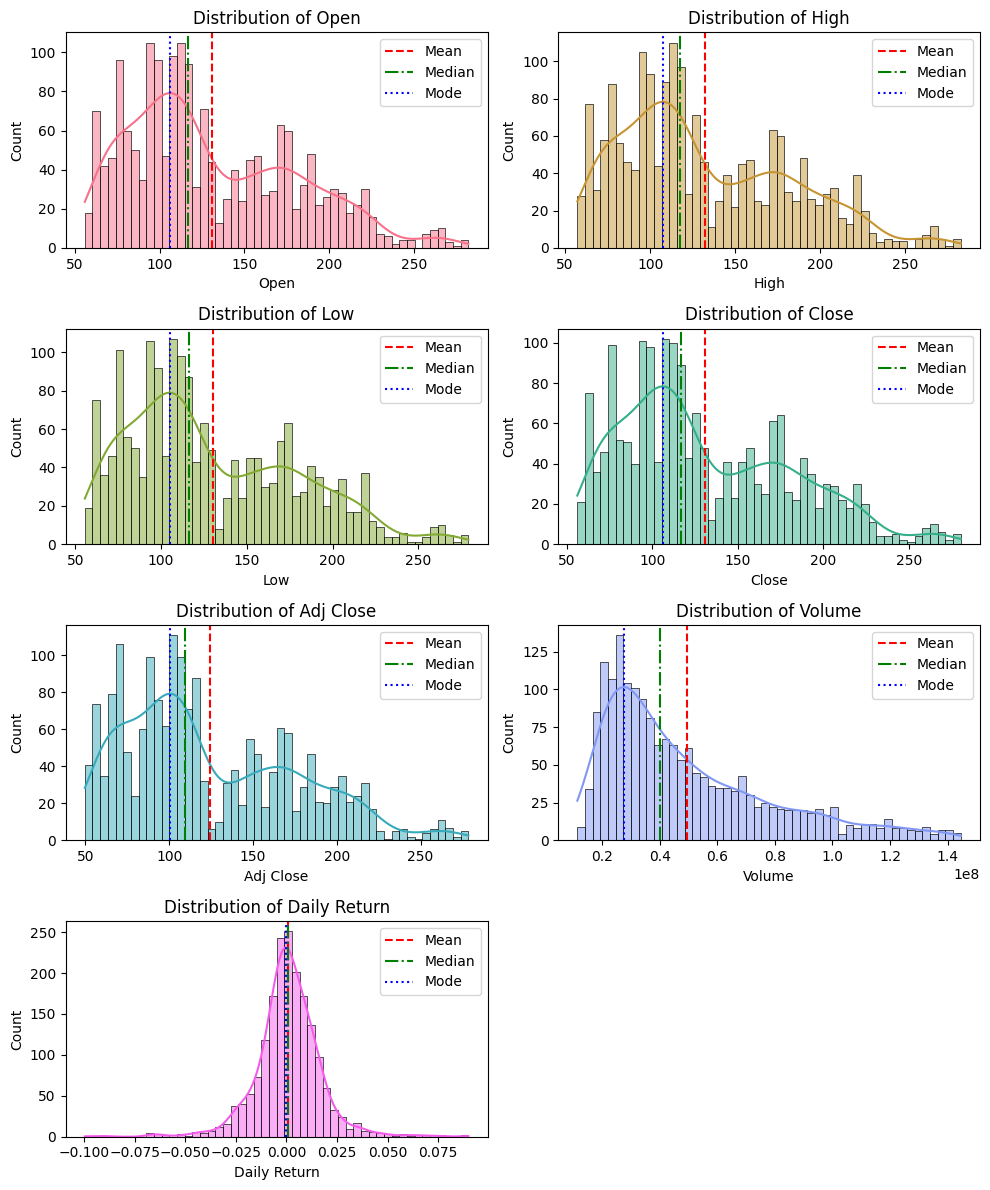

Open - Skewness 0.65, -Kurtosis -0.36 
High - Skewness 0.65, -Kurtosis -0.37 
Low - Skewness 0.65, -Kurtosis -0.35 
Close - Skewness 0.65, -Kurtosis -0.35 
Adj Close - Skewness 0.68, -Kurtosis -0.36 
Volume - Skewness 1.17, -Kurtosis 0.69 


In [28]:
# 9. Distribution Plot
from scipy.stats import skew, kurtosis
from scipy.stats import gaussian_kde

colors= sns.color_palette('husl', len(cols_to_plot))

plt.figure(figsize= (10, 3 * ((len(cols_to_plot) + 1 ) // 2)))

for i, col in enumerate(cols_to_plot, 1):
  plt.subplot((len(cols_to_plot) + 1) // 2, 2, i)
  sns.histplot(data= df, x= col, bins= 50, kde= True, color= colors[i -1])
  plt.title(f'Distribution of {col}')

  mean= df[col].mean()
  median= df[col].median()
  kde= gaussian_kde(df[col].dropna())
  x_val= np.linspace(df[col].min(), df[col].max(), 1000)
  mode= x_val[np.argmax(kde(x_val))]

  plt.axvline(mean, color= 'red', linestyle= '--', label= 'Mean')
  plt.axvline(median, color= 'green', linestyle= '-.', label= 'Median')
  plt.axvline(mode, color= 'blue', linestyle= ':', label= 'Mode')
  plt.legend()

plt.tight_layout()
plt.show()

# Printing Skewness & Kurtosis
for col in cols_to:
  print(f'{col} - Skewness {skew(df[col]):.2f}, -Kurtosis {kurtosis(df[col]):.2f} ')

1. ##### Skewness Indicates Asymmetry in Price and Volume Distributions
- Most of the price-related distributions (Open, High, Low, Close, Adj Close) show positive (right) skew, where mean > median > mode.
- This implies that there are occasional very high prices, pulling the mean to the right.
- The Volume distribution is also right-skewed, suggesting a few days had unusually high trading volumes.

2. ##### Daily Returns Are Approximately Normally Distributed
- The Daily Return plot resembles a bell curve, indicating symmetry around zero.
- Mean, median, and mode are all very close to 0, which is expected in efficient markets.
- This supports that most returns are small (close to 0), while large gains or losses are rare.
- Suggests low autocorrelation and aligns with random walk hypothesis in finance.

3. ##### Outliers and Tail Behavior Are Evident
- Several plots (especially for Volume, High, and Adj Close) show long tails, suggesting outliers or extreme values.
- For instance, sharp spikes in trading activity or price surges/drops.
- This could imply volatility and the need to use robust statistical measures in further analysis or modeling.

In [29]:
df['Date']= pd.to_datetime(df['Date'], dayfirst= True) # ensure datetime
df.set_index('Date', inplace= True) # set it as index
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_20,MA_50,Daily Return
Date,,,,,,,,,
2012-05-14,80.367142,81.072861,79.657143,79.745712,68.911415,88156600,81.306357,70.948200,-0.014981
2012-05-15,80.207146,80.459999,78.821426,79.024284,68.287987,119084000,81.526071,71.353743,-0.009047
2012-05-16,79.150002,79.555717,77.291428,78.011429,67.412743,140224000,81.671214,71.732714,-0.012817
2012-05-24,82.267143,82.357140,80.175713,80.760002,69.787910,124057500,81.815071,72.153543,0.035233
2012-05-25,80.655716,80.835716,79.781425,80.327141,69.413841,82126800,81.960071,72.553228,-0.005360


### ii. Seasonality

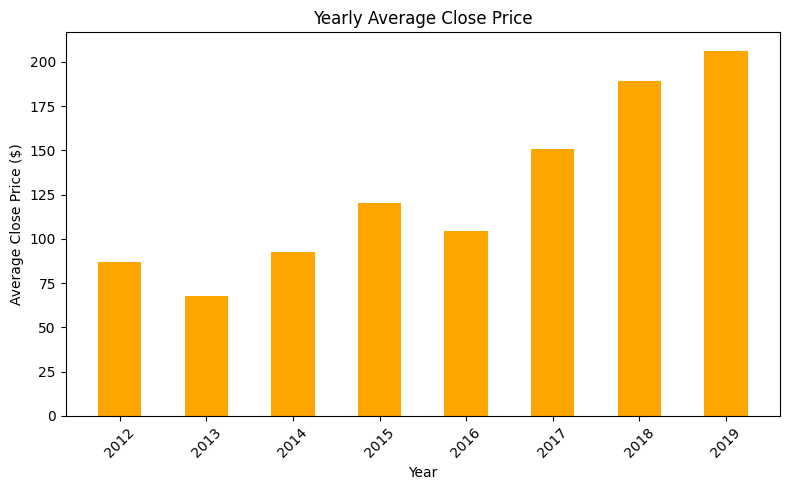

In [30]:
# 10. Yearly Average Close Price
plt.figure(figsize= (8, 5))
yearly_avg= df['Close'].resample('A-DEC').mean()
'''A = Annual frequency.
DEC = Year ends in December.
So you're grouping the data year by year, where each group ends on December 31st.
Example: All rows in 2012 will be grouped together and labeled as 2012-12-31'''

plt.bar(yearly_avg.index.strftime('%Y'), yearly_avg.values, color= 'orange', width= 0.5)
'''plt.bar(x, y): Creates a bar chart.
x = categories (in this case, years).
y = values (in this case, average closing prices).

yearly_avg.index.strftime('%Y'):
The yearly_avg index contains dates like '2012-12-31'.
strftime('%Y') converts them to just '2012', '2013', etc.
So your x-axis will just show the year instead of full date with time.

yearly_avg.values:
These are the mean closing prices for each year (from the previous line).'''

plt.title('Yearly Average Close Price')
plt.xlabel('Year')
plt.ylabel('Average Close Price ($)')
#plt.grid(True)
#plt.savefig('yearly_avg_close.png')
plt.xticks(rotation= 45)
plt.tight_layout() # Avoid label cut-off
plt.show()

In [31]:
yearly_returns= df['Close'].resample('A-DEC').last().pct_change() * 100
print("\nYearly Returns ($): \n", yearly_returns)


Yearly Returns ($): 
 Date
2012-12-31          NaN
2013-12-31    10.092431
2014-12-31    37.724142
2015-12-31    -4.638517
2016-12-31    10.032299
2017-12-31    46.114657
2018-12-31    -6.789571
2019-12-31    77.152272
Freq: YE-DEC, Name: Close, dtype: float64


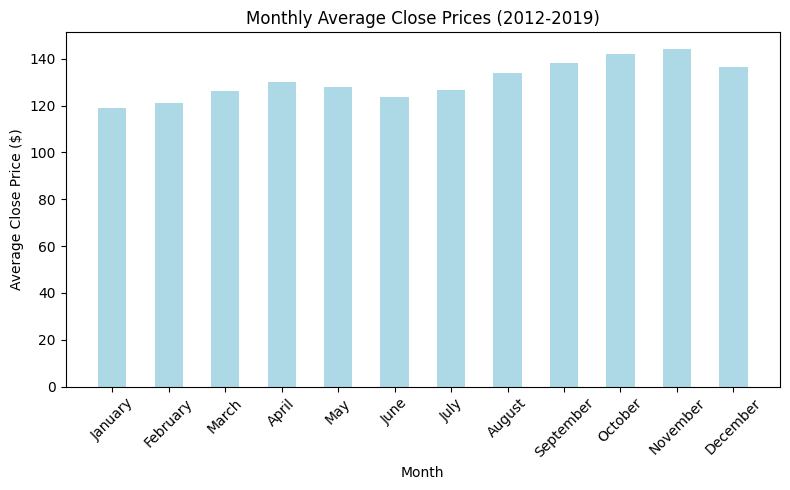

In [32]:
# 11. Monthly Average Close Prices
import calendar

plt.figure(figsize= (8, 5))
monthly_avg= df['Close'].groupby(df.index.month).mean()
month_names= [calendar.month_name[i] for i in monthly_avg.index]

# Plot
plt.bar(month_names, monthly_avg.values, color= 'lightblue', width= 0.5)
plt.xlabel('Month')
plt.ylabel('Average Close Price ($)')
plt.title('Monthly Average Close Prices (2012-2019)')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

**Seasonality** =>	Mild seasonality (e.g., months like Nov/Dec show higher values)

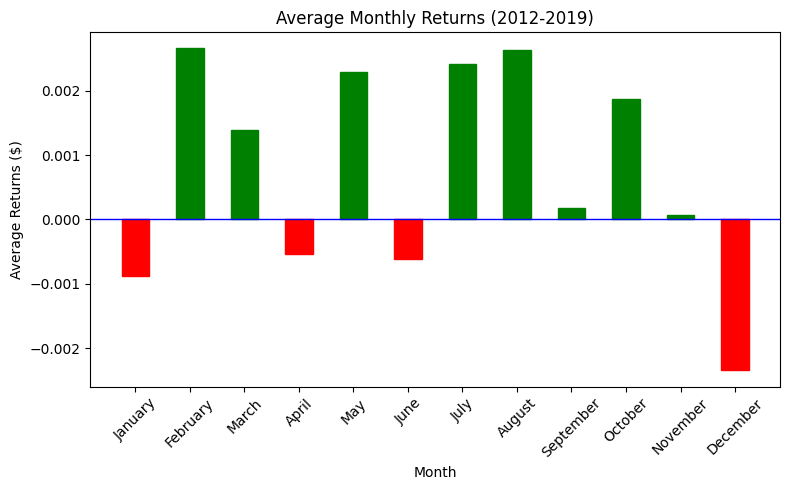

In [33]:
# 12. Monthly Average Returns
plt.figure(figsize= (8, 5))
monthly_avg= df['Daily Return'].groupby(df.index.month).mean()
month_names= [calendar.month_name[i] for i in monthly_avg.index]

# Plot bars and store them in a variable
bars= plt.bar(month_names, monthly_avg.values, width= 0.5)

#  Color bars based on value
for bar, value in zip(bars, monthly_avg.values):
  bar.set_color('green' if value > 0 else 'red')

# Plot
plt.xlabel('Month')
plt.ylabel('Average Returns ($)')
plt.title('Average Monthly Returns (2012-2019)')
plt.axhline(0, color= 'blue', linewidth= 1)
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

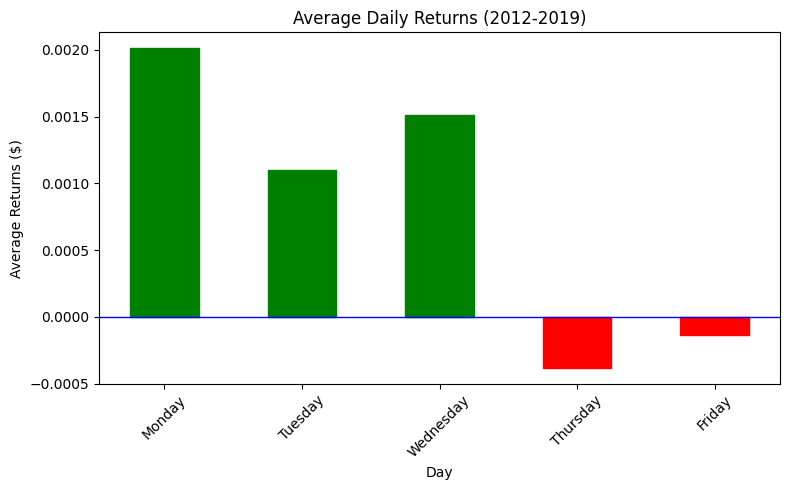

In [34]:
# 13. Daily Average Returns
plt.figure(figsize= (8, 5))

# Group by day of the week (0 = Monday, 6 = Sunday)
daily_avg= df['Daily Return'].groupby(df.index.dayofweek).mean()
# Map day numbers to names
day_names= [calendar.day_name[i] for i in daily_avg.index]

# Plot bars and store them in a variable
bars= plt.bar(day_names, daily_avg.values, width= 0.5)

#  Color bars based on value
for bar, value in zip(bars, daily_avg.values):
  bar.set_color('green' if value > 0 else 'red')

# Plot
plt.xlabel('Day')
plt.ylabel('Average Returns ($)')
plt.title('Average Daily Returns (2012-2019)')
plt.axhline(0, color= 'blue', linewidth= 1)
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

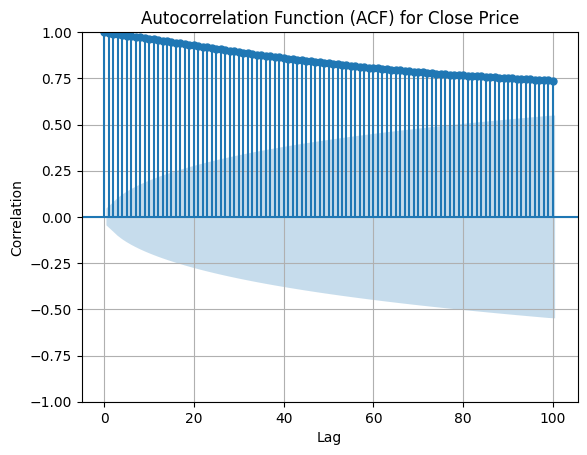

In [35]:
# 14. Plot Autocorrelation function(ACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize= (8, 5))
plot_acf(df['Close'], lags= 100)
plt.title('Autocorrelation Function (ACF) for Close Price')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

•	ACF shows the correlation of the time series with its own past values (lags).

•	You can see very high autocorrelations at all lags, gradually decreasing.

•	This indicates a strong persistence — past values heavily influence future values.

•	The slow decay pattern is a classic signature of a non-stationary series (i.e., the mean and variance change over time).

•	This suggests the presence of a trend component in your time series.

**Autocorrelation** =>	High across many lags (indicates trend)


<Figure size 800x500 with 0 Axes>

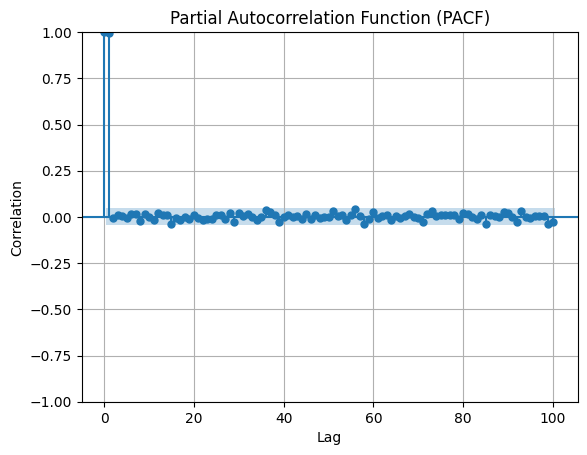

In [36]:
# 15. Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize= (8,5))
plot_pacf(df['Close'], lags= 100)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

•	PACF shows the correlation between observations at lag k after removing the effects of lags < k.

•	Significant spikes are seen at lag 1 and 2, with all other lags being mostly insignificant.

**Partial Autocorrelation** =>	Significant at lag 1 and 2, suggests AR(2) structure

### iii. Stationarity
### ADF (Augmented Dickey-Fuller) test

In [37]:
from statsmodels.tsa.stattools import adfuller

for col in df:
  # Apply ADF test on the 'Daily Return' column
  result= adfuller(df[col].dropna())

  # Extract Results
  print(f'ADF test for "{col}"')
  print("ADF Statistic:", result[0])
  print("p-value:", result[1])
  print("Critical Values:")
  for key, value in result[4].items():
    print(f'   {key}: {value}')

  # Interpreting the result
  if result[1] < 0.05:
    print("✅ The series is stationary (reject H0).\n")
  else:
    print("⚠️ The series is not stationary (fail to reject H0).\n")

ADF test for "Open"
ADF Statistic: 1.176602887008452
p-value: 0.9958201769989713
Critical Values:
   1%: -3.4339421732313236
   5%: -2.8631267441543695
   10%: -2.5676147289449824
⚠️ The series is not stationary (fail to reject H0).

ADF test for "High"
ADF Statistic: 1.4234493612357397
p-value: 0.9972181079917527
Critical Values:
   1%: -3.433934297502219
   5%: -2.8631232673540117
   10%: -2.5676128776645637
⚠️ The series is not stationary (fail to reject H0).

ADF test for "Low"
ADF Statistic: 1.247186201346625
p-value: 0.996296218118618
Critical Values:
   1%: -3.433934297502219
   5%: -2.8631232673540117
   10%: -2.5676128776645637
⚠️ The series is not stationary (fail to reject H0).

ADF test for "Close"
ADF Statistic: 1.0944826656794846
p-value: 0.9951692582149341
Critical Values:
   1%: -3.4339461240890983
   5%: -2.8631284882870625
   10%: -2.5676156576381293
⚠️ The series is not stationary (fail to reject H0).

ADF test for "Adj Close"
ADF Statistic: 1.1936283324737278
p-valu


**Stationarity**            =>  Likely non-stationary due to strong trend and persistent ACF    

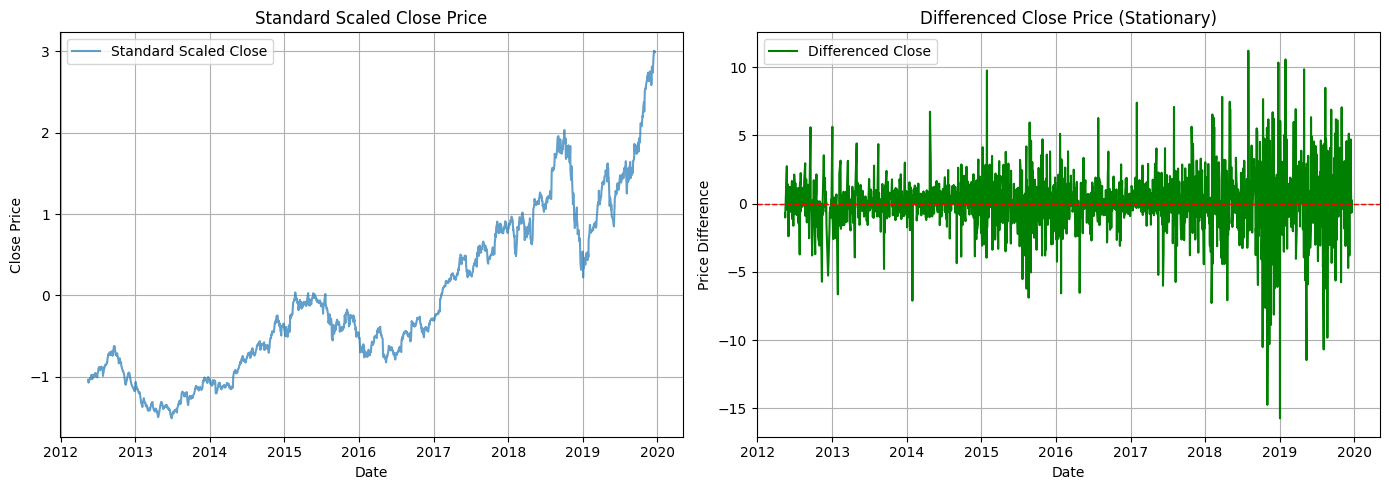

In [38]:
# Test-1
from sklearn.preprocessing import StandardScaler

# 1. Standard Scaling
scaler = StandardScaler()
scaled_close = scaler.fit_transform(df[['Close']])

# 2. Differencing
differenced_close = df['Close'].diff().dropna()

# Plotting
plt.figure(figsize=(14, 5))

# Plot 1: Original vs Scaled
plt.subplot(1, 2, 1)
#plt.plot(df.index, df['Close'], label='Original Close')
plt.plot(df.index, scaled_close, label='Standard Scaled Close', alpha=0.7)
plt.title('Standard Scaled Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Plot 2: Differenced
plt.subplot(1, 2, 2)
plt.plot(differenced_close.index, differenced_close, color='green', label='Differenced Close')
plt.title('Differenced Close Price (Stationary)')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_20,MA_50,Daily Return
Date,,,,,,,,,
2012-05-14,80.367142,81.072861,79.657143,79.745712,68.911415,88156600,81.306357,70.948200,-0.014981
2012-05-15,80.207146,80.459999,78.821426,79.024284,68.287987,119084000,81.526071,71.353743,-0.009047
2012-05-16,79.150002,79.555717,77.291428,78.011429,67.412743,140224000,81.671214,71.732714,-0.012817
2012-05-24,82.267143,82.357140,80.175713,80.760002,69.787910,124057500,81.815071,72.153543,0.035233
2012-05-25,80.655716,80.835716,79.781425,80.327141,69.413841,82126800,81.960071,72.553228,-0.005360


First-order differencing is used to remove trends and make a time series stationary (i.e., constant mean and variance over time).

|  Differenced Value
t
​
 =Value
t
​
 −Value
t−1
  |

In [40]:
# Create a new DataFrame with differenced columns
df_diff = pd.DataFrame(index=df.index)

# Apply differencing to selected columns
df_diff['Open'] = df['Open'].diff()
df_diff['High'] = df['High'].diff()
df_diff['Low'] = df['Low'].diff()
df_diff['Close'] = df['Close'].diff()
df_diff['Adj_Close'] = df['Adj Close'].diff()
df_diff['Volume'] = df['Volume'].diff()
df_diff['MA_20'] = df['MA_20'].diff()
df_diff['MA_50'] = df['MA_50'].diff()
df_diff['Daily_Return'] = df['Daily Return']

In [43]:
df_diff.dropna(inplace= True)
df_diff.shape

(1829, 9)

In [45]:
df_diff.head()

,Open,High,Low,Close,Adj_Close,Volume,MA_20,MA_50,Daily_Return
Date,,,,,,,,,
2012-05-15,-0.159996,-0.612862,-0.835717,-0.721428,-0.623428,30927400.0,0.219714,0.405543,-0.009047
2012-05-16,-1.057144,-0.904282,-1.529998,-1.012855,-0.875244,21140000.0,0.145143,0.378971,-0.012817
2012-05-24,3.117141,2.801423,2.884285,2.748573,2.375167,-16166500.0,0.143857,0.420829,0.035233
2012-05-25,-1.611427,-1.521424,-0.394288,-0.432861,-0.374069,-41930700.0,0.145000,0.399686,-0.005360
2012-05-29,0.901428,1.164284,0.977143,1.425712,1.232041,13000400.0,0.193571,0.430114,0.017749


# Model Building

In [46]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [48]:
# Train-Test split
train_size= int(len(df_diff) * 0.8)
train, test= df_diff['Close'][:train_size], df_diff['Close'][train_size:]

# Statistical Model (time series models): i. ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Mean Squared Error: 12.54020124307963
Root Mean Squared Error: 3.5412146564532954


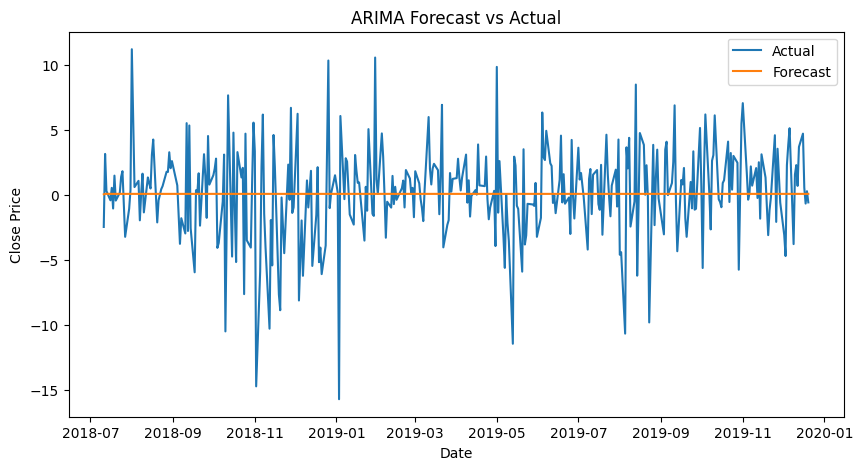

In [49]:
# Fit ARIMA(p,d,q) - Assume ARIMA(2,0,0) from PACF/ACF
model= ARIMA(train, order= (2, 0, 0))
model_fit= model.fit()

# Forecast
forecast= model_fit.forecast(steps= len(test))

# Evaluation
mse= mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Plot
plt.figure(figsize= (10, 5))
plt.plot(test.index, test, label= 'Actual')
plt.plot(test.index, forecast, label= 'Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show();

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



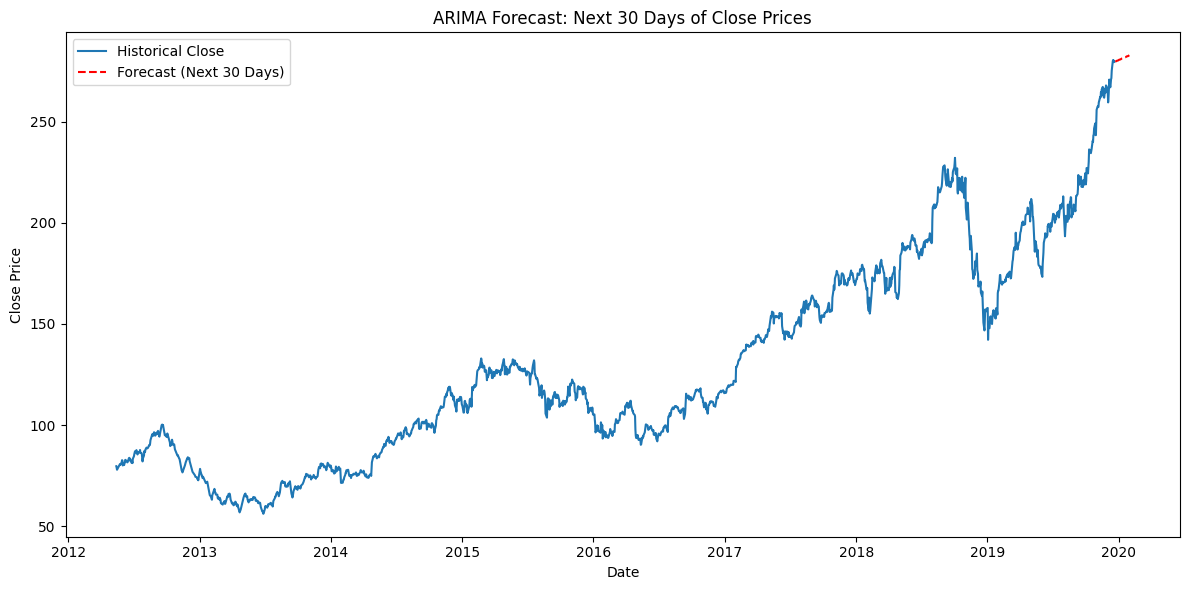

In [51]:
# 1. Re-train the model on the full 'Close_diff' series
full_model = ARIMA(df_diff['Close'], order=(2, 0, 0))
full_model_fit = full_model.fit()

# 2. Forecast the next 30 *differenced* values
forecast_diff_30 = full_model_fit.forecast(steps=30)

# 3. Get the last known actual 'Close' value
last_close = df['Close'].iloc[-1]

# 4. Reconstruct the forecasted 'Close' prices by reversing the differencing
forecast_close_30 = last_close + forecast_diff_30.cumsum()

# 5. Create date index for the next 30 days
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')  # 'B' = business days

# 6. Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical Close')
plt.plot(future_dates, forecast_close_30, label='Forecast (Next 30 Days)', linestyle='--', color= 'red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast: Next 30 Days of Close Prices')
plt.legend()
plt.tight_layout()
plt.show();

# ii. SARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Mean Squared Error: 12.51104169405855
Root Mean Squared Error: 3.5370950925948472


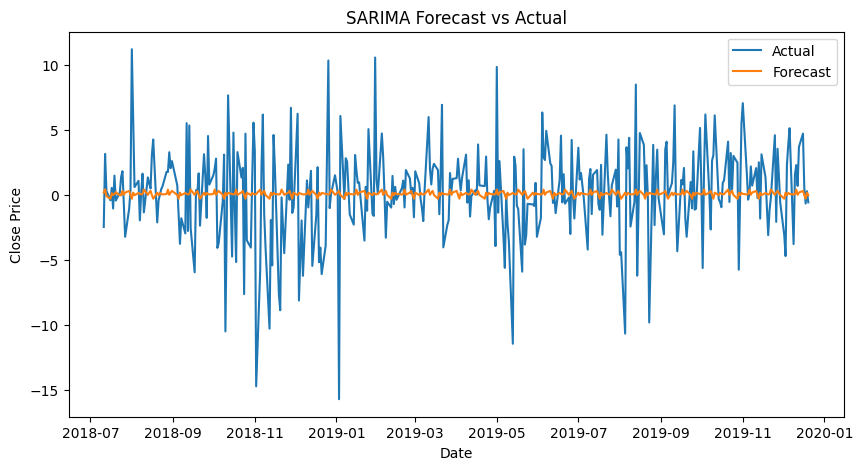

In [52]:
model= SARIMAX(train, order= (2, 0, 0), seasonal_order= (1, 1, 1, 12))
model_fit= model.fit(disp= False)

# Forecast
forecast= model_fit.forecast(steps= len(test))

# Evaluation
mse= mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

rmse= np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Plot
plt.figure(figsize= (10, 5))
plt.plot(test.index, test, label= 'Actual')
plt.plot(test.index, forecast, label= 'Forecast')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show();

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



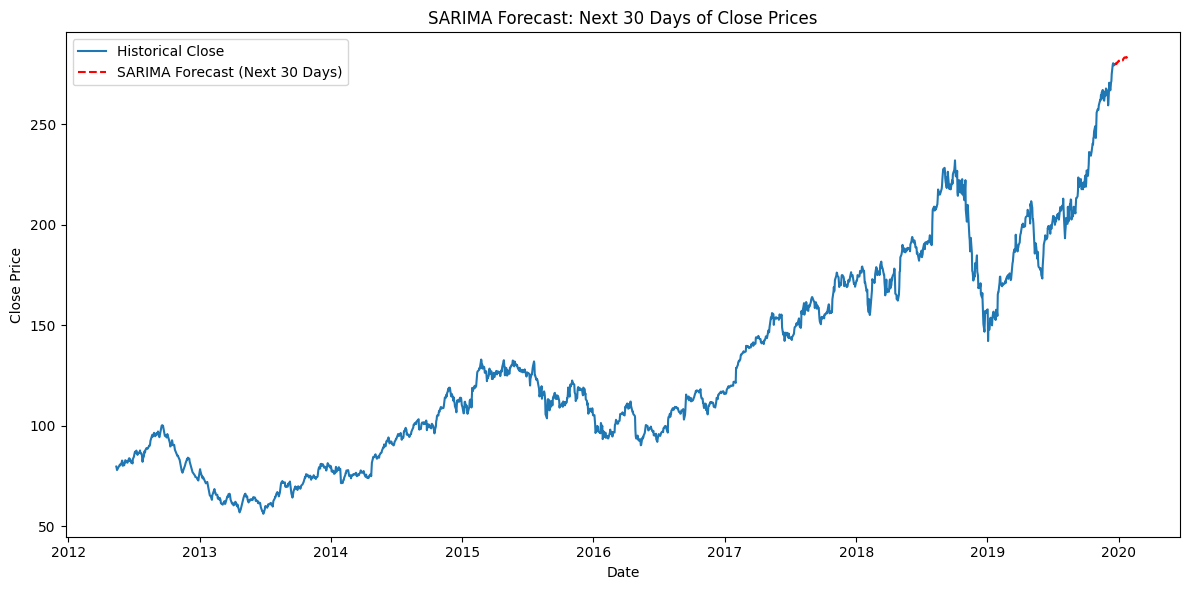

In [54]:
# 1. Re-train SARIMA on the full Close_diff series
full_sarima = SARIMAX(df_diff['Close'],
                      order=(2, 0, 0),
                      seasonal_order=(1, 1, 1, 12))
full_sarima_fit = full_sarima.fit(disp=False)

# 2. Forecast the next 30 differenced values
forecast_diff_30 = full_sarima_fit.forecast(steps=30)

# 3. Get the last known actual Close price
last_close = df['Close'].iloc[-1]

# 4. Reverse differencing to get actual Close price forecast
forecast_close_30 = last_close + forecast_diff_30.cumsum()

# 5. Create future date index (business days)
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# 6. Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical Close')
plt.plot(future_dates, forecast_close_30, label='SARIMA Forecast (Next 30 Days)', linestyle='--', color= 'red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMA Forecast: Next 30 Days of Close Prices')
plt.legend()
plt.tight_layout()
plt.show();

# iii. VAR (Vector AutoRegression)

In [63]:
df_diff.head()

,Open,High,Low,Close,Adj_Close,Volume,MA_20,MA_50,Daily_Return
Date,,,,,,,,,
2012-05-15,-0.159996,-0.612862,-0.835717,-0.721428,-0.623428,30927400.0,0.219714,0.405543,-0.009047
2012-05-16,-1.057144,-0.904282,-1.529998,-1.012855,-0.875244,21140000.0,0.145143,0.378971,-0.012817
2012-05-24,3.117141,2.801423,2.884285,2.748573,2.375167,-16166500.0,0.143857,0.420829,0.035233
2012-05-25,-1.611427,-1.521424,-0.394288,-0.432861,-0.374069,-41930700.0,0.145000,0.399686,-0.005360
2012-05-29,0.901428,1.164284,0.977143,1.425712,1.232041,13000400.0,0.193571,0.430114,0.017749


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Selected Lag Order: 15
VAR Close_diff, Mean Squared Error: 12.541511220857918
VAR Close_diff, Root Mean Squared Error: 3.5413996132684487


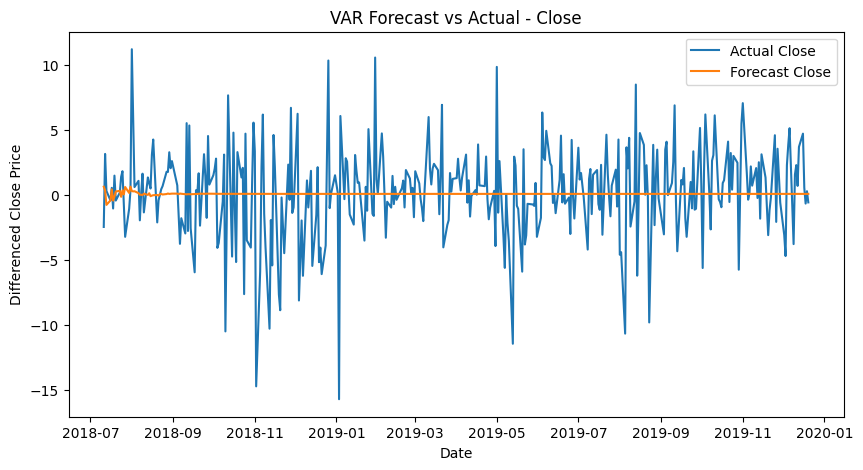

In [68]:
from statsmodels.tsa.api import VAR

# 1. Select the differenced columns
var_data= df_diff[['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'MA_20', 'MA_50']].dropna()

# Train-test split (80-20)
train_size= int(len(var_data) * 0.8)
train, test= var_data[:train_size], var_data[train_size:]

# 2. Fit VAR model on training data
model= VAR(train)
lag_order= model.select_order(maxlags= 15).aic # Automatically select lag using AIC
model_fit= model.fit(lag_order)

print(f'Selected Lag Order: {lag_order}')

# 4. Forecast for test period
forecast_input= train.values[-lag_order:]
forecast_diff= model_fit.forecast(y= forecast_input, steps= len(test))

# 5. Convert Forecast to dataframe
forecast_df= pd.DataFrame(forecast_diff, columns= var_data.columns, index= test.index)

# Evaluation
mse = mean_squared_error(test['Close'], forecast_df['Close'])
print(f'VAR Close_diff, Mean Squared Error: {mse}')

rmse= np.sqrt(mse)
print(f'VAR Close_diff, Root Mean Squared Error: {rmse}')

# 7. Plot Actual vs Forecast for Close_diff
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['Close'], label='Actual Close')
plt.plot(test.index, forecast_df['Close'], label='Forecast Close')
plt.title('VAR Forecast vs Actual - Close')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()

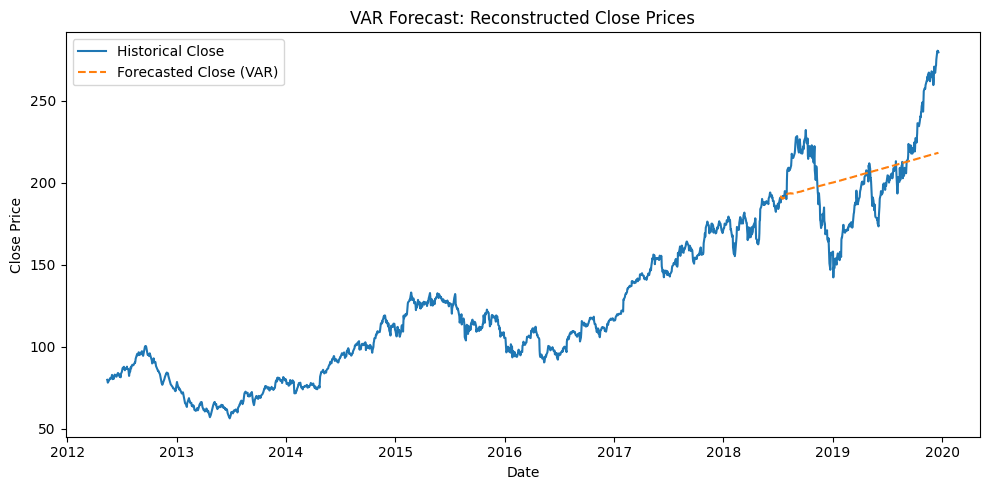

In [69]:
last_close = df['Close'].iloc[train_size - 1]  # last known Close
forecast_close = last_close + forecast_df['Close'].cumsum()

# Plot actual Close and forecast
future_dates = test.index
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Historical Close')
plt.plot(future_dates, forecast_close, label='Forecasted Close (VAR)', linestyle='--')
plt.title('VAR Forecast: Reconstructed Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Selected Lag Order: 15


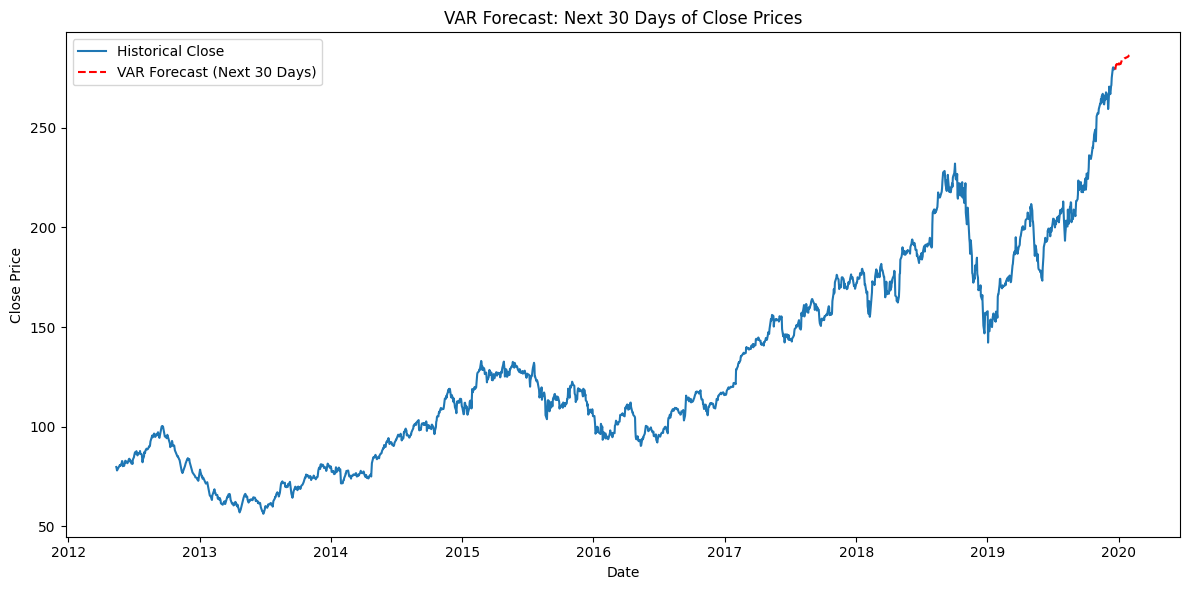

In [74]:
# 2. Fit VAR model on full dataset
model = VAR(var_data)
lag_order = model.select_order(maxlags=15).aic  # Select optimal lag
model_fitted = model.fit(lag_order)

print(f'Selected Lag Order: {lag_order}')

# 3. Forecast next 30 steps (differenced values)
forecast_input = var_data.values[-lag_order:]
forecast_diff_30 = model_fitted.forecast(y=forecast_input, steps=30)

# 4. Extract Close_diff forecast and reverse differencing
forecast_close_diff_30 = forecast_diff_30[:, var_data.columns.get_loc('Close')]
last_close = df['Close'].iloc[-1]
forecast_close_30 = last_close + np.cumsum(forecast_close_diff_30)

# 5. Create future date index (business days)
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# 6. Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical Close')
plt.plot(future_dates, forecast_close_30, label='VAR Forecast (Next 30 Days)', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('VAR Forecast: Next 30 Days of Close Prices')
plt.legend()
plt.tight_layout()
plt.show()


## Standardizing & splitting

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Features and target
features = df_diff.drop(columns=['Close'])  # input features
target = df_diff['Close']                  # target variable

# 2. Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [96]:
# 3. Create DataFrame for scaled features (preserve index and column names)
X = pd.DataFrame(scaled_features, index=features.index, columns=features.columns)
y = target.copy()

# 4. Train-test split (time-aware)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Display shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1463, 8)
X_test shape: (366, 8)


 # Machine Learning:
 ## iv. XGBoost

### Build Lag Features for Autoregressive XGBoost

In [102]:
# # 1. Create Lagged Features of Close_diff
# # For example, if you want to use the past 5 values to predict the next one:

# n_lags = 15

# df_lag = df_diff[['Close_diff']].copy()
# for i in range(1, n_lags + 1):
#     df_lag[f'lag_{i}'] = df_lag['Close_diff'].shift(i)

# df_lag.dropna(inplace=True)
# Now your feature matrix X consists of lagged Close_diff, and target y is the current Close_diff.

In [108]:
# df_lag.head()

In [120]:
# # 2. Train-Test Split (Time-aware)
# X = df_lag.drop(columns=['Close_diff'])
# y = df_lag['Close_diff']

# split_idx = int(len(X) * 0.8)
# X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
# y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGBoost MSE: 0.7806, RMSE: 0.8835


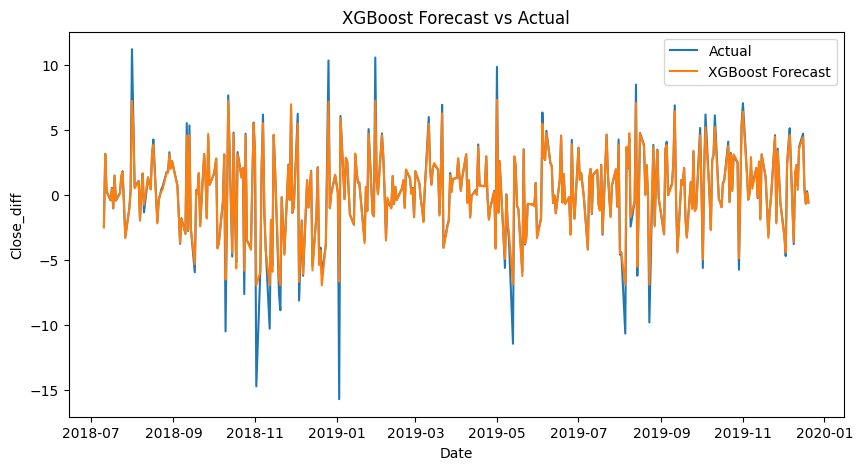

In [99]:
# 3. Train XGBoost on Lag Features
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 1. Define model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# 2. TimeSeriesSplit for time-aware CV
tscv = TimeSeriesSplit(n_splits=5)

# 3. Grid Search parameters
xgb_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

# 4. Grid Search
xgb_grid = GridSearchCV(xgb, xgb_params, cv=tscv, scoring='neg_mean_squared_error', verbose=1)
xgb_grid.fit(X_train, y_train)

# 5. Best model
best_xgb = xgb_grid.best_estimator_

# 6. Forecast
y_pred_xgb = best_xgb.predict(X_test)

# 7. Evaluation
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
print(f"XGBoost MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# 8. Plot
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost Forecast')
plt.title('XGBoost Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close_diff')
plt.legend()
plt.show()

In [106]:
# # 4. Recursive Forecast for Next 30 Days
# # Start with the last known lag values
# last_known = df_lag.iloc[-1, 1:].values.reshape(1, -1)  # shape (1, n_lags)
# future_preds = []

# for _ in range(30):
#     next_pred = best_xgb.predict(last_known)[0]
#     future_preds.append(next_pred)

#     # Update lags: drop oldest, add new prediction
#     last_known = np.roll(last_known, shift=-1)
#     last_known[0, -1] = next_pred

In [104]:
# last_close = df['Close'].iloc[-1]
# forecast_close = last_close + np.cumsum(future_preds)

In [107]:
# # 6. Create Date Index and Plot
# future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

# plt.figure(figsize=(12, 6))
# plt.plot(df['Close'], label='Historical Close')
# plt.plot(future_dates, forecast_close, label='XGBoost Forecast (Next 30 Days)', linestyle='--', color='red')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.title('XGBoost Forecast (Lagged Close_diff)')
# plt.legend()
# plt.tight_layout()
# plt.show()

## Hybrid model: both lag & other features

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Hybrid Model MSE: 12.6114, RMSE: 3.5513


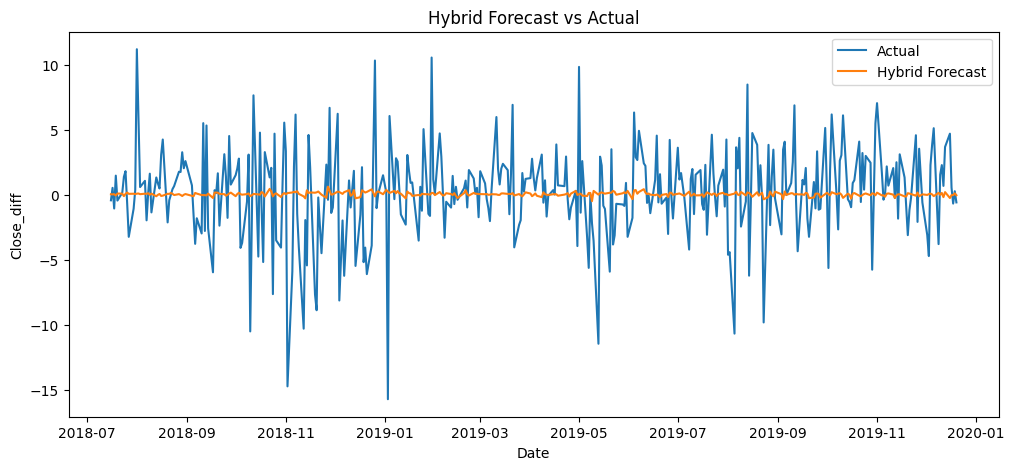

In [80]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Step 1: Define lag function
def create_lagged_df(df, target_col, exog_cols, n_lags=15):
    df_lag = pd.DataFrame(index=df.index)

    # Lagged target
    for i in range(1, n_lags+1):
        df_lag[f'{target_col}_lag_{i}'] = df[target_col].shift(i)

    # Lagged exogenous features
    for col in exog_cols:
        for i in range(1, n_lags+1):
            df_lag[f'{col}_lag_{i}'] = df[col].shift(i)

    # Add target column (not lagged)
    df_lag[target_col] = df[target_col]

    # Drop NA rows (first n_lags)
    df_lag = df_lag.dropna()
    return df_lag

# Define target and exogenous features
target_col = 'Close'
exog_cols = ['Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Daily_Return', 'MA_20', 'MA_50']

# Create hybrid lagged dataframe
df_hybrid = create_lagged_df(df_diff, target_col, exog_cols, n_lags=15)

# Features and target
X = df_hybrid.drop(columns=[target_col])
y = df_hybrid[target_col]

# Standardize
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# Time-aware train-test split
split_idx = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled.iloc[:split_idx], X_scaled.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Model and grid search
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}
grid = GridSearchCV(xgb, param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)
grid.fit(X_train, y_train)

# Forecast
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Hybrid Model MSE: {mse:.4f}, RMSE: {rmse:.4f}')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Hybrid Forecast')
plt.title('Hybrid Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close_diff')
plt.legend()
plt.show()

In [85]:
future_forecast = []
last_lags = df_hybrid.drop(columns=[target_col]).iloc[-1:].copy()

for _ in range(30):
    # 1. Scale input
    input_scaled = pd.DataFrame(scaler.transform(last_lags), columns=last_lags.columns)

    # 2. Predict next Close_diff
    next_pred = best_model.predict(input_scaled)[0]
    future_forecast.append(next_pred)

    # 3. Update lag features for next step
    updated_row = last_lags.copy()

    # Shift all lag columns (from lag_1 to lag_15)
    for col in df_hybrid.drop(columns=[target_col]).columns:
        if '_lag_' in col:
            base = col.split('_lag_')[0]
            lag_num = int(col.split('_lag_')[1])
            if lag_num == 1:
                updated_row[col] = next_pred if base == target_col else last_lags[f'{base}_lag_1'].values[0]
            else:
                updated_row[col] = last_lags.get(f'{base}_lag_{lag_num - 1}', last_lags[col]).values[0]

    # Move to next prediction step
    last_lags = updated_row.copy()


In [86]:
last_close = df['Close'].iloc[-1]
forecast_close = last_close + pd.Series(future_forecast).cumsum()


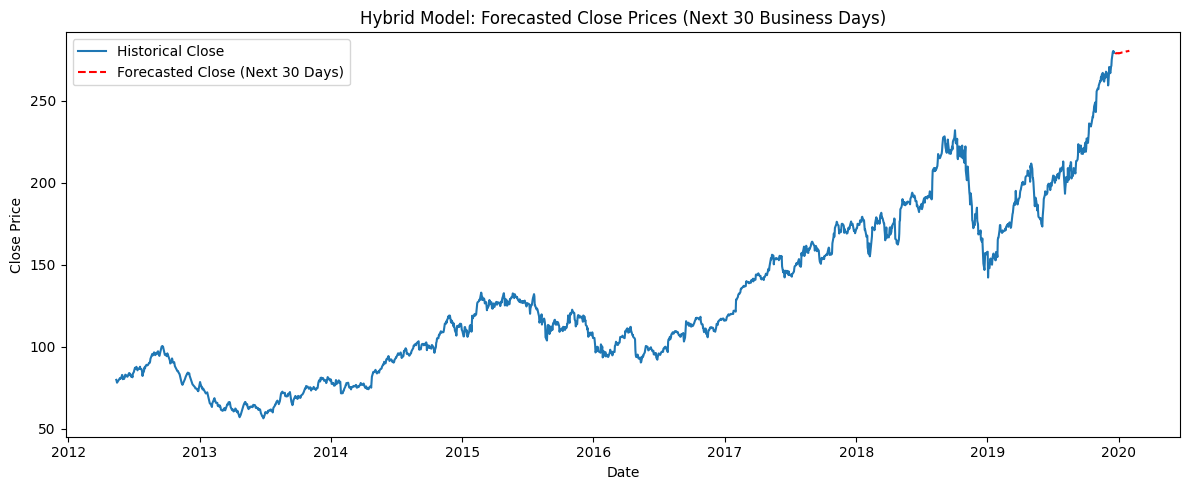

In [89]:
# Plot the forecast
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Historical Close')
plt.plot(future_dates, forecast_close, label='Forecasted Close (Next 30 Days)', linestyle='--', color= 'red')
plt.title('Hybrid Model: Forecasted Close Prices (Next 30 Business Days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()


## iv. Random Forest

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Random Forest MSE: 13.1615, RMSE: 3.6279


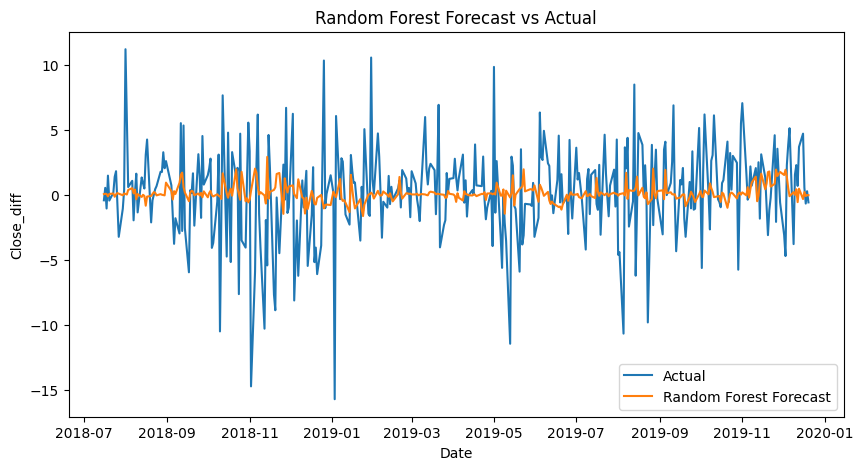

In [81]:
from sklearn.ensemble import RandomForestRegressor

# 1. Define model
rf = RandomForestRegressor(random_state=42)

# 2. Grid Search parameters
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

# 3. Grid Search
rf_grid = GridSearchCV(rf, rf_params, cv=tscv, scoring='neg_mean_squared_error', verbose=1)
rf_grid.fit(X_train, y_train)

# 4. Best model
best_rf = rf_grid.best_estimator_

# 5. Forecast
y_pred_rf = best_rf.predict(X_test)

# 6. Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}")

# 7. Plot
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Random Forest Forecast')
plt.title('Random Forest Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close_diff')
plt.legend()
plt.show()

In [91]:
n_forecast = 30
future_forecast = []

# Get the last row of lag features
last_lags = df_hybrid.drop(columns=[target_col]).iloc[-1:].copy()

for _ in range(n_forecast):
    # Scale the lag features
    input_scaled = pd.DataFrame(scaler.transform(last_lags), columns=last_lags.columns)

    # Predict next Close_diff
    next_pred = best_rf.predict(input_scaled)[0]
    future_forecast.append(next_pred)

    # Create updated lag features for next prediction
    updated_row = last_lags.copy()

    for col in df_hybrid.drop(columns=[target_col]).columns:
        if '_lag_' in col:
            base = col.split('_lag_')[0]
            lag_num = int(col.split('_lag_')[1])
            if lag_num == 1:
                # Use next_pred if it's the target column
                updated_row[col] = next_pred if base == target_col else last_lags[f'{base}_lag_1'].values[0]
            else:
                # Shift lag
                prev_col = f'{base}_lag_{lag_num - 1}'
                if prev_col in last_lags.columns:
                    updated_row[col] = last_lags[prev_col].values[0]

    # Move to next step
    last_lags = updated_row.copy()


In [92]:
last_close = df['Close'].iloc[-1]
forecast_close = last_close + pd.Series(future_forecast).cumsum()


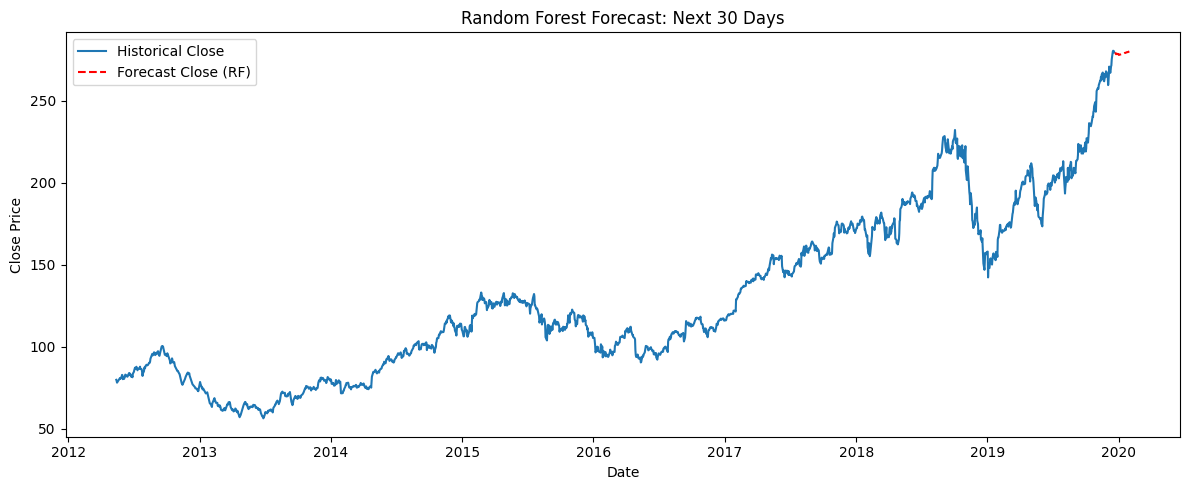

In [94]:
# Future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='B')  # 'B' = business days

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Historical Close')
plt.plot(future_dates, forecast_close, label='Forecast Close (RF)', linestyle='--', color= 'red')
plt.title('Random Forest Forecast: Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()
